In [49]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
def load_agents(filename):
    with open(filename, 'rb') as file:
        print('Loading agents from file: ' + filename)
        return pickle.load(file)

In [50]:
directory_path = '../saved_sim_runs'
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

files = [f for f in files if 'balanced_10k_iterations_sim_' in f]
files.sort()
print(files)

['balanced_10k_iterations_sim_loss_history.pkl']


In [51]:
sim_agents_list = []
for file in files:
    sim_agents_list.append(load_agents(os.path.join(directory_path, file)))

Loading agents from file: ../saved_sim_runs/balanced_10k_iterations_sim_loss_history.pkl


In [52]:
def sort_agents_by_opinion(agents):
    return sorted(agents.items(), key=lambda x: x[1].opinions[0])

Sim with 9999 iterations
1


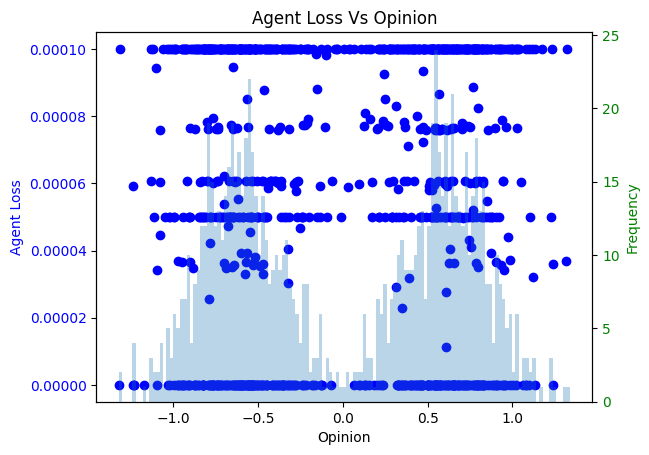

51


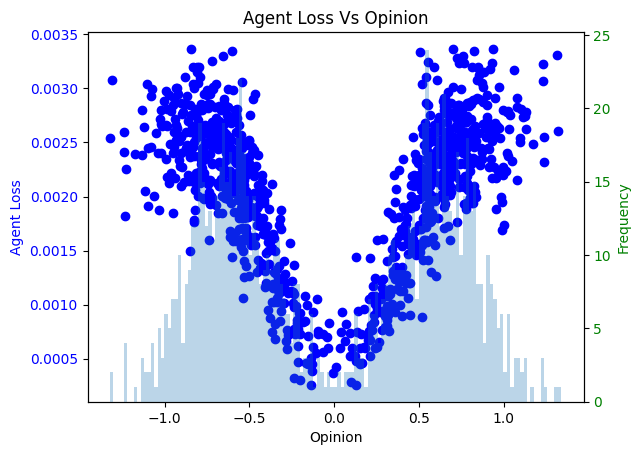

101


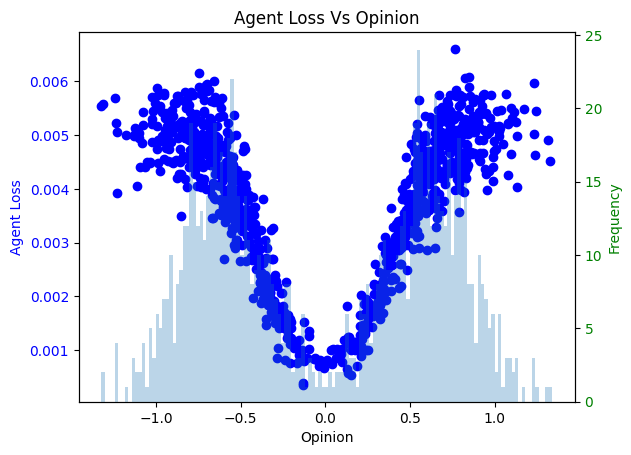

151


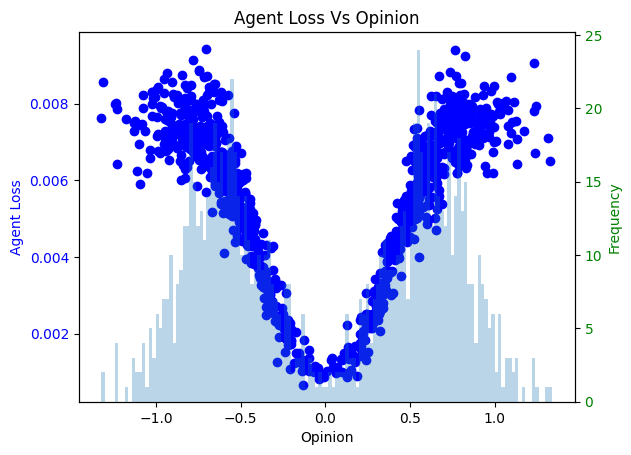

201


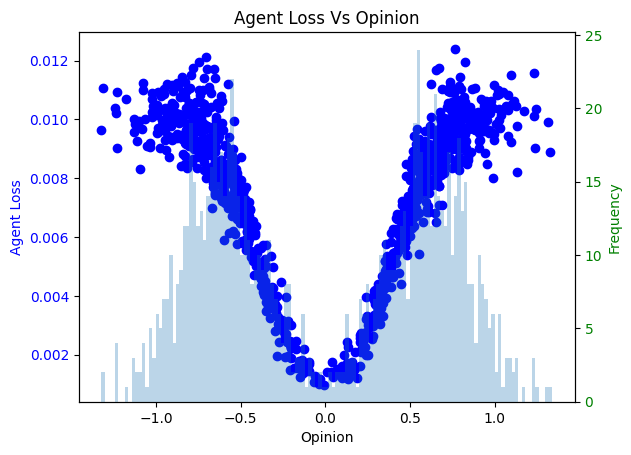

251


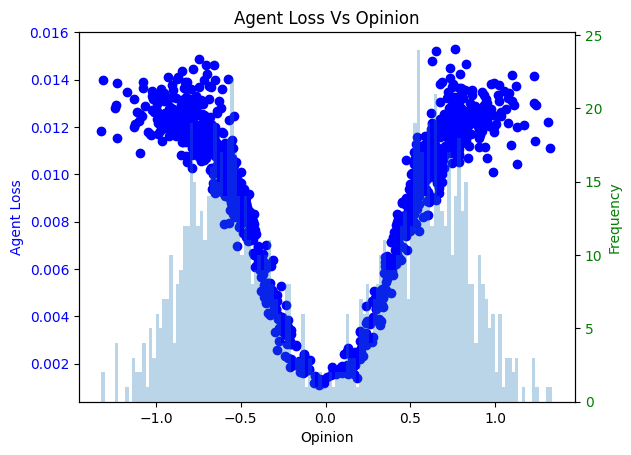

301


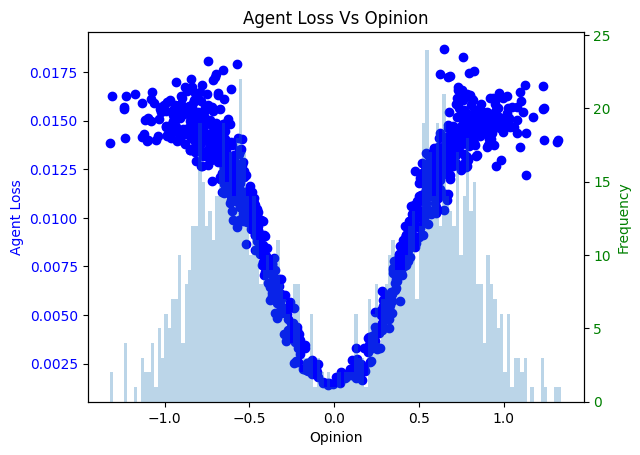

351


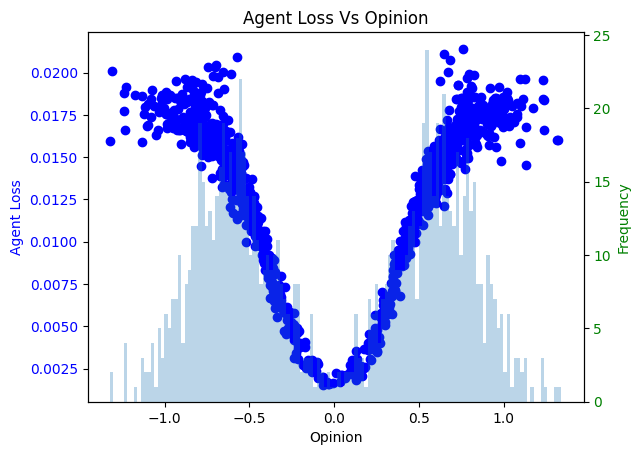

401


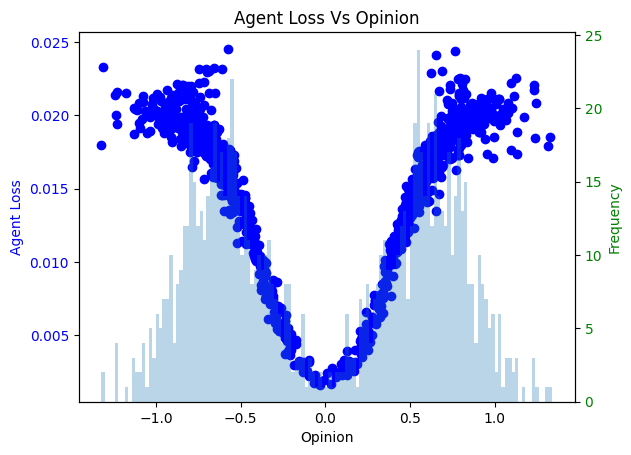

451


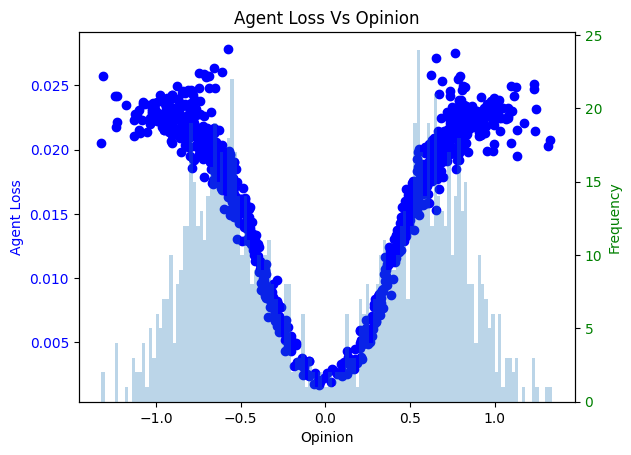

501


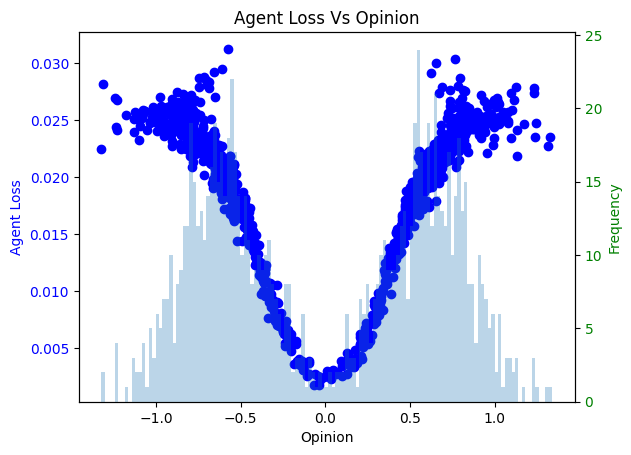

551


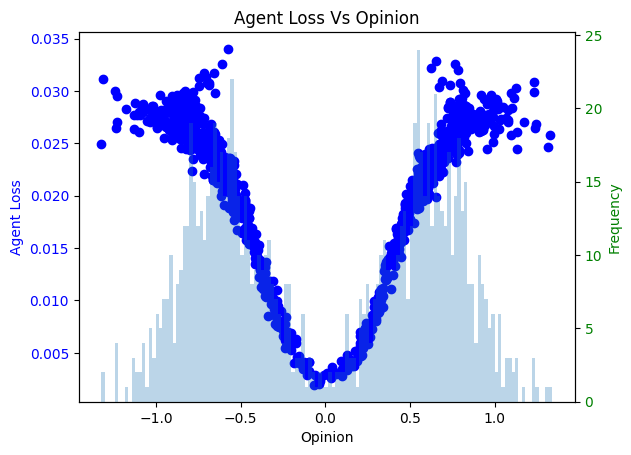

601


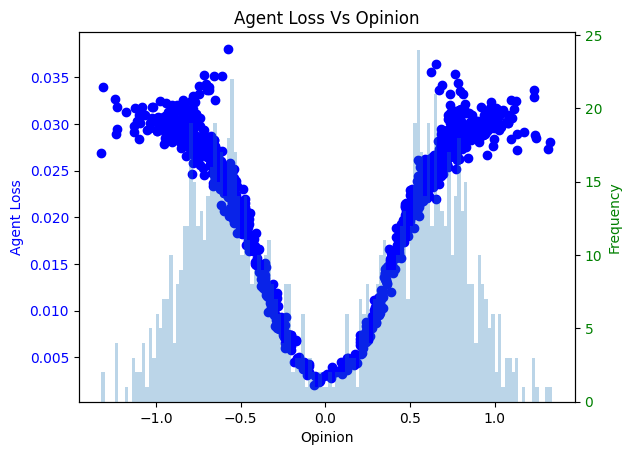

651


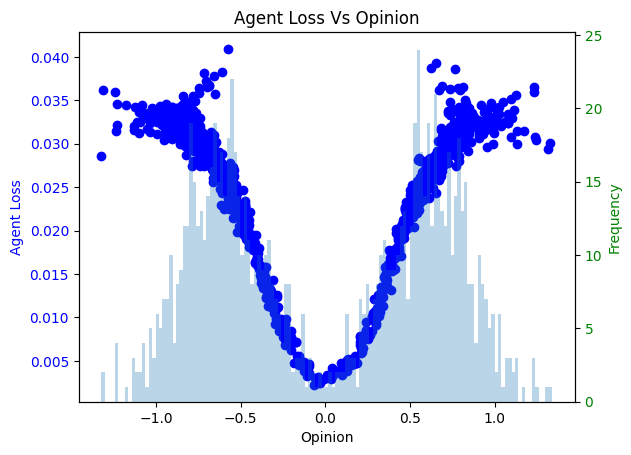

701


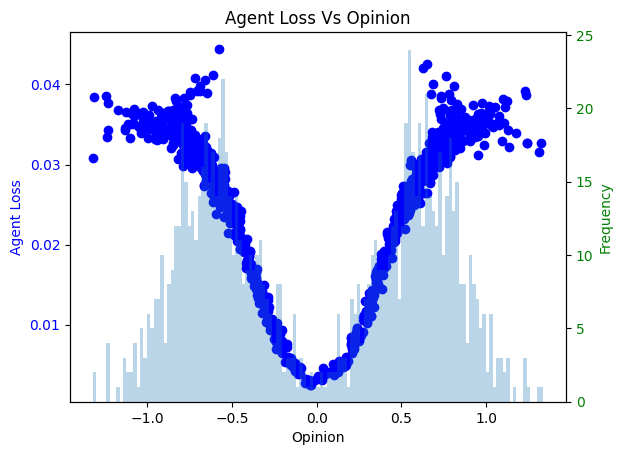

751


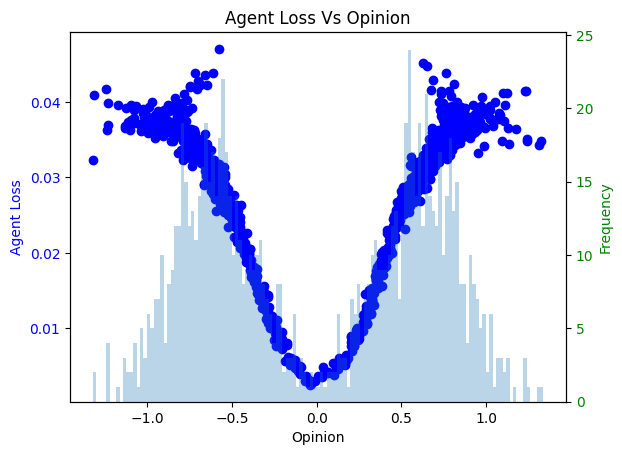

801


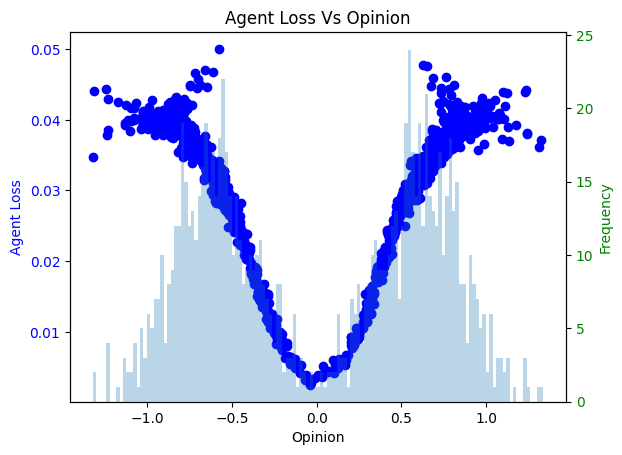

851


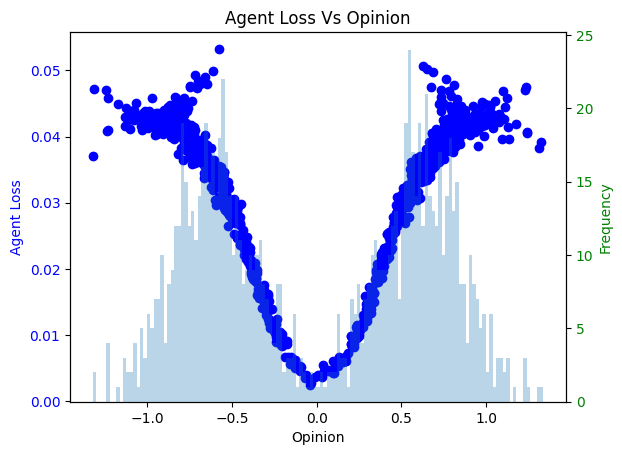

901


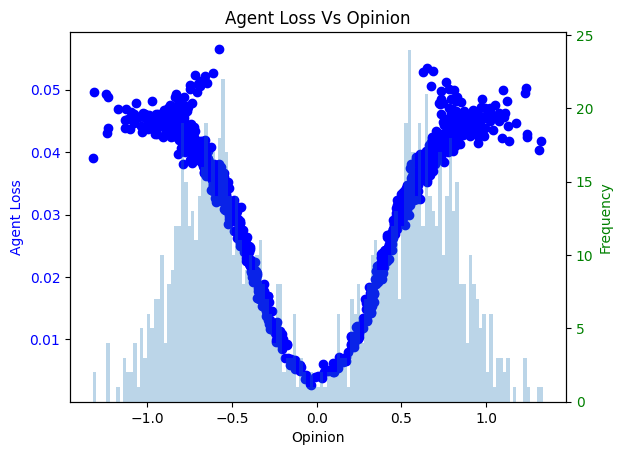

951


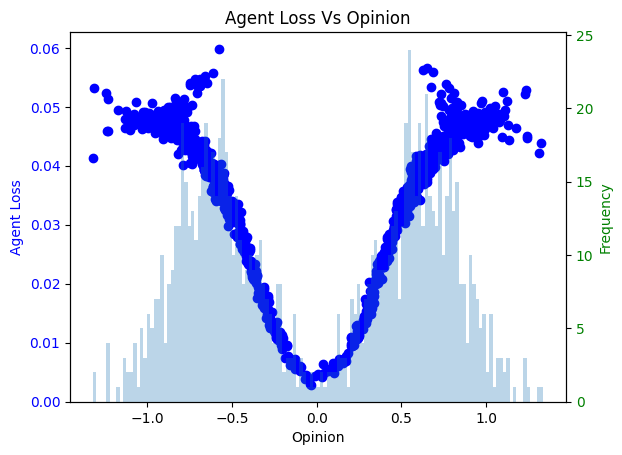

1001


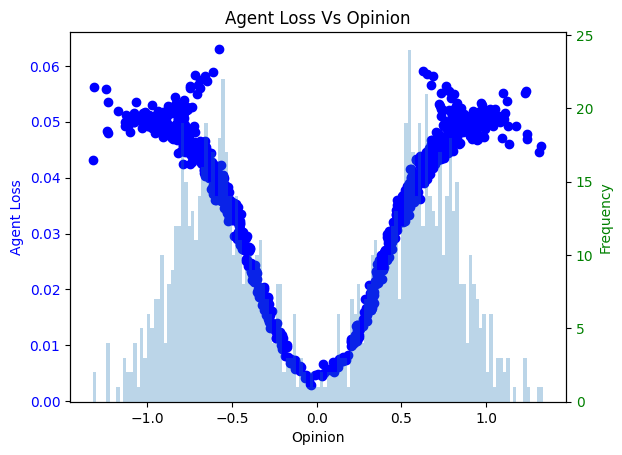

1051


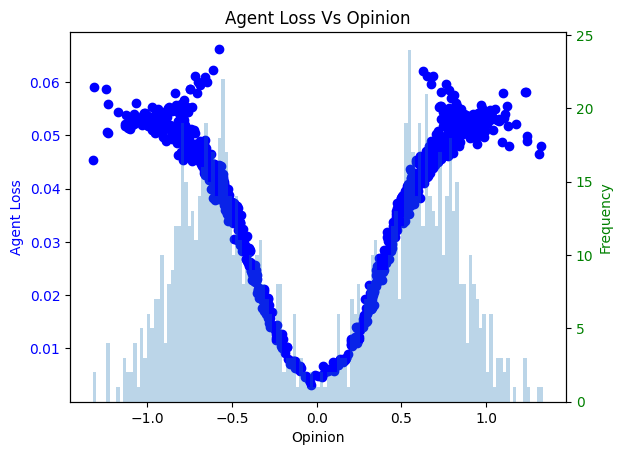

1101


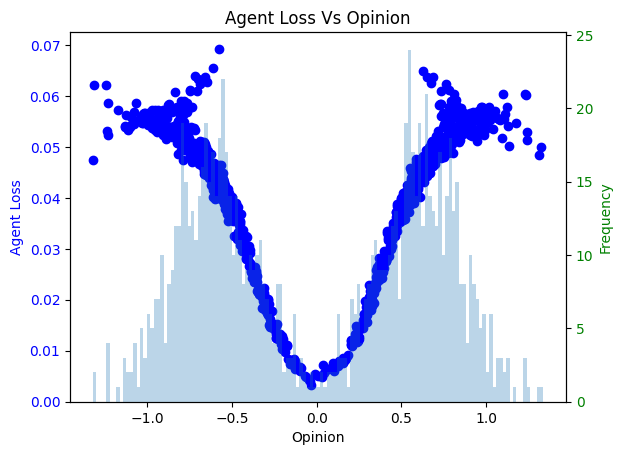

1151


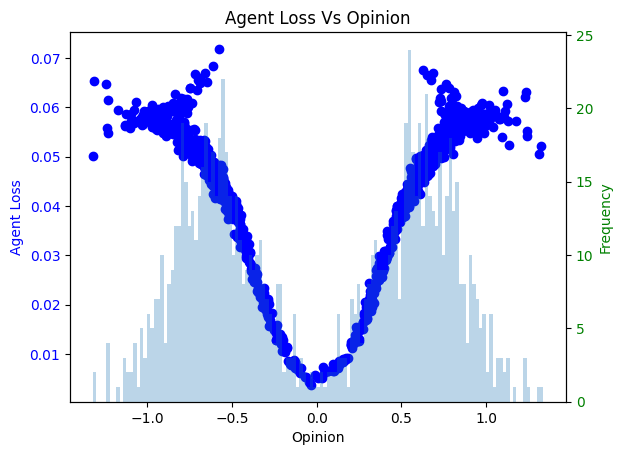

1201


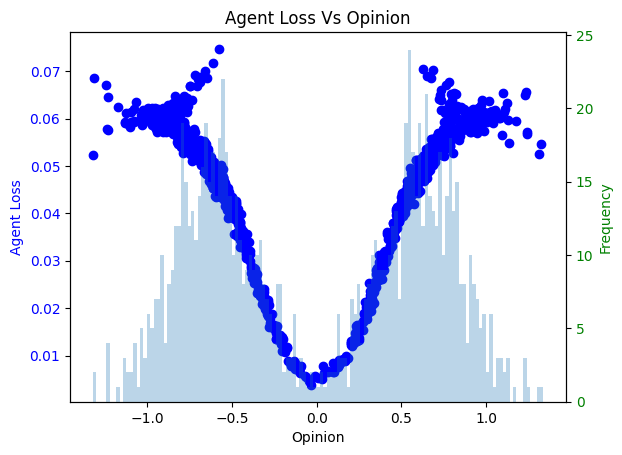

1251


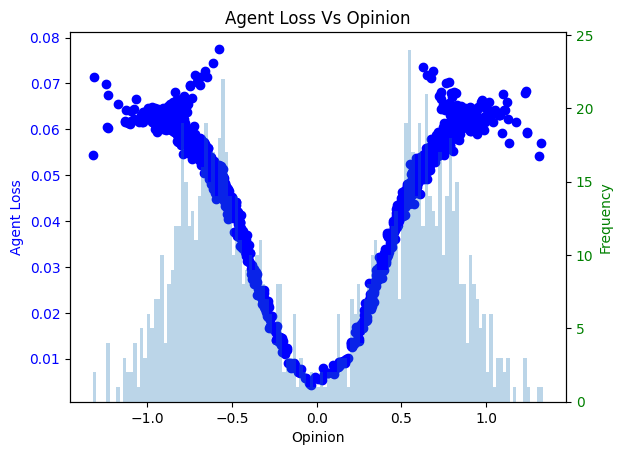

1301


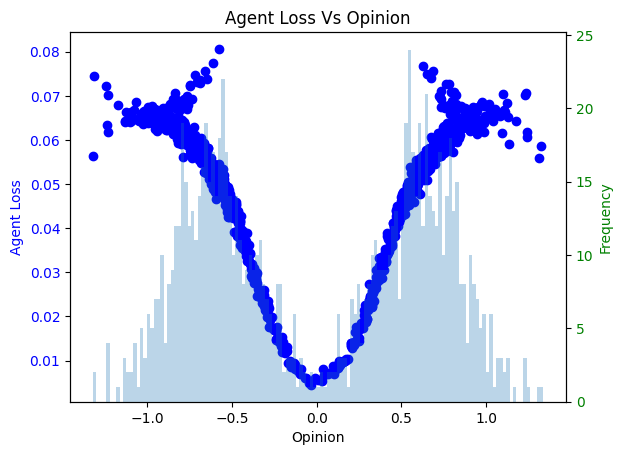

1351


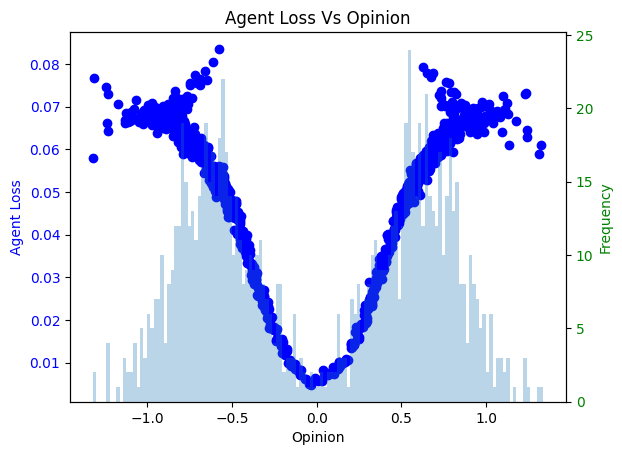

1401


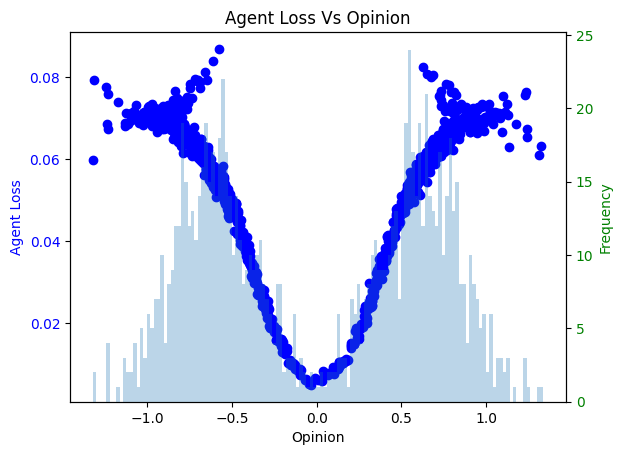

1451


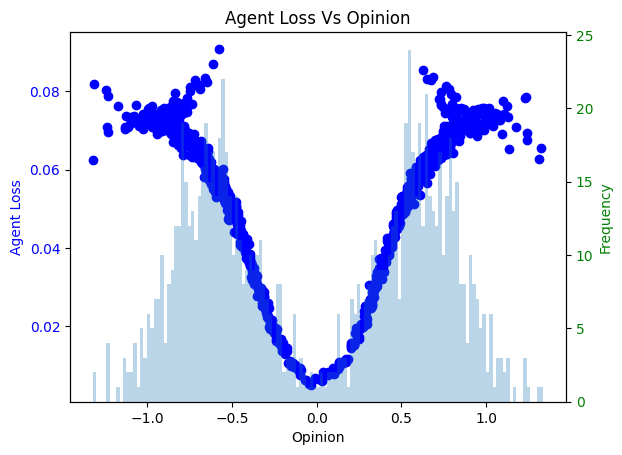

1501


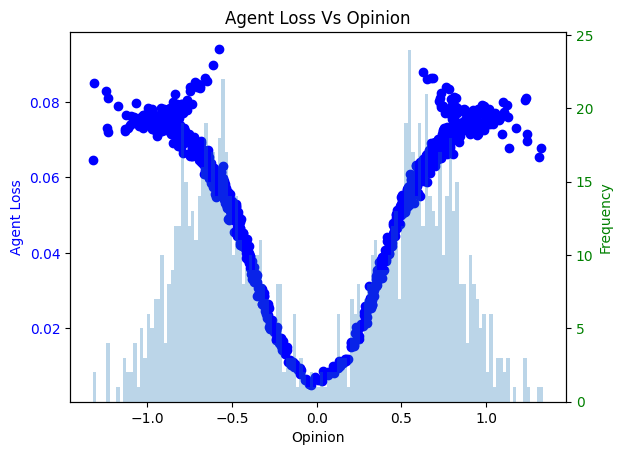

1551


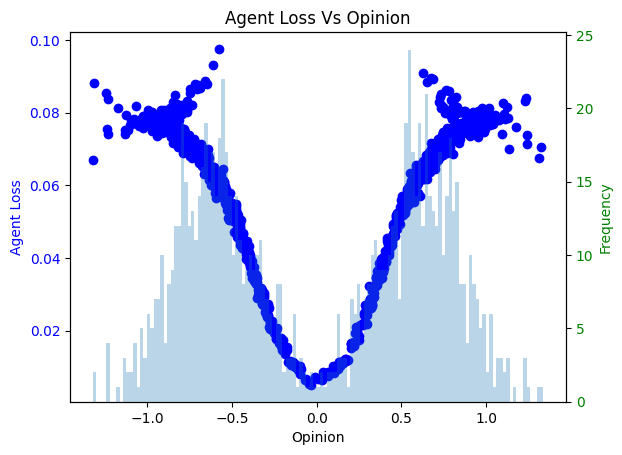

1601


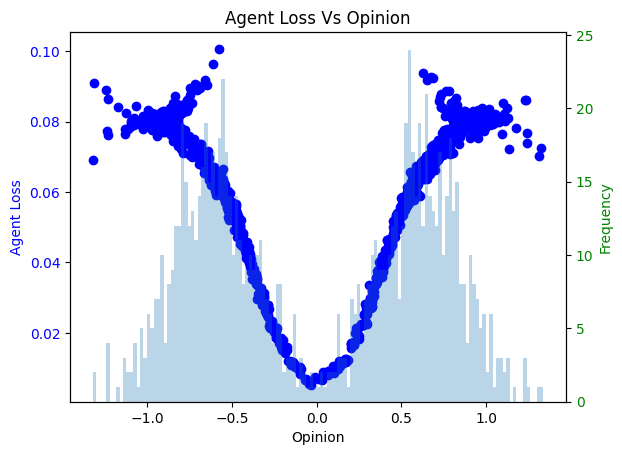

1651


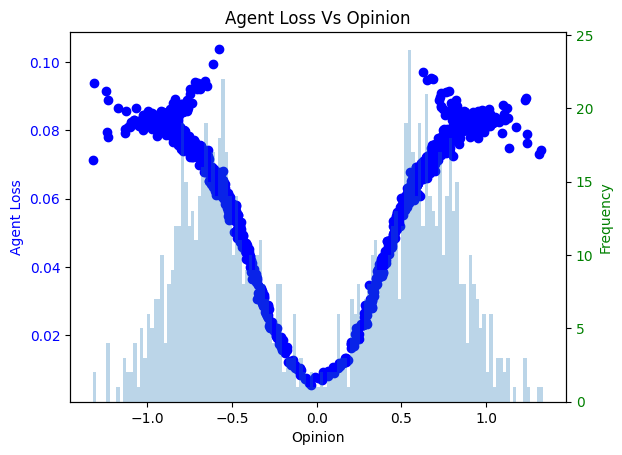

1701


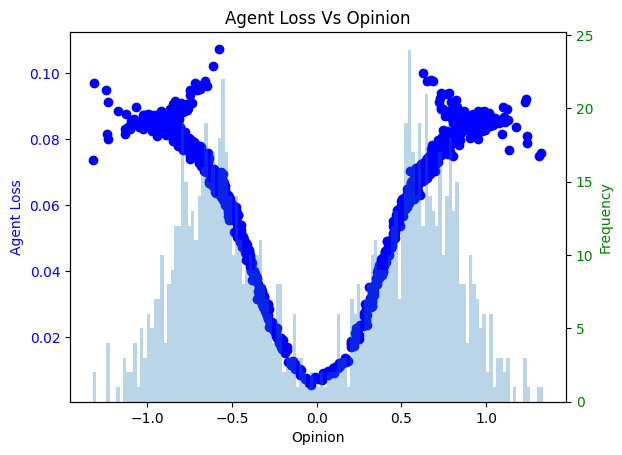

1751


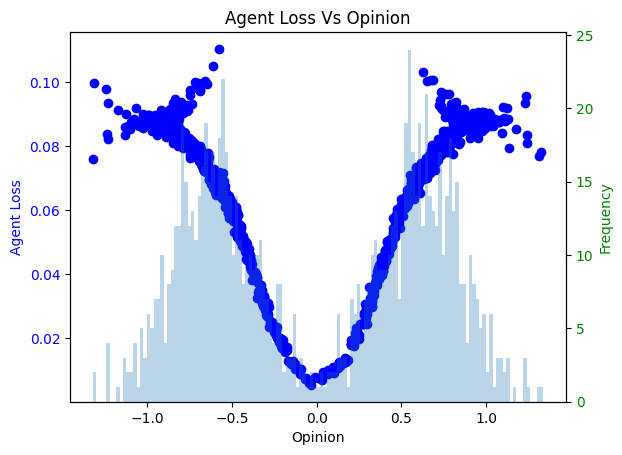

1801


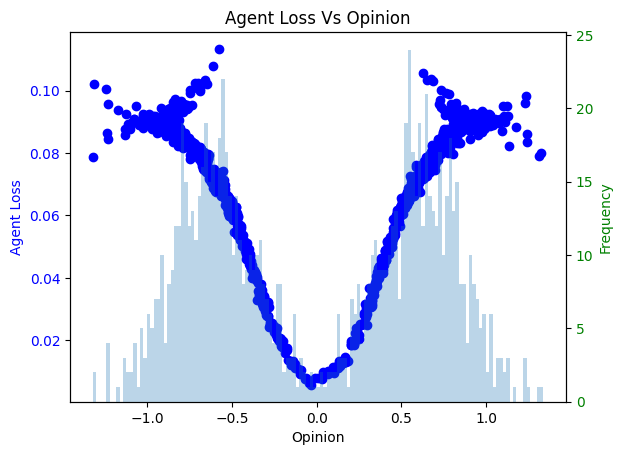

1851


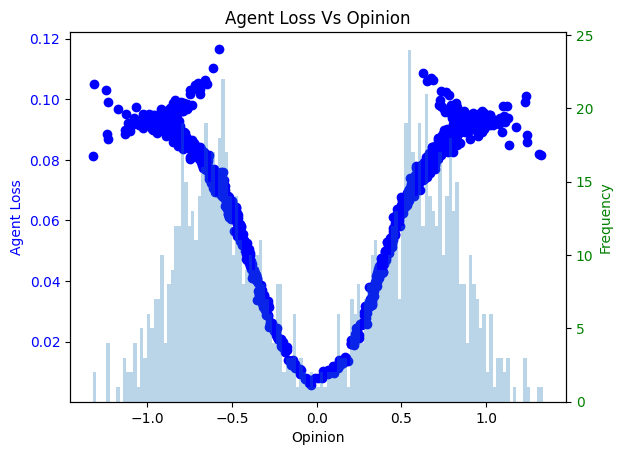

1901


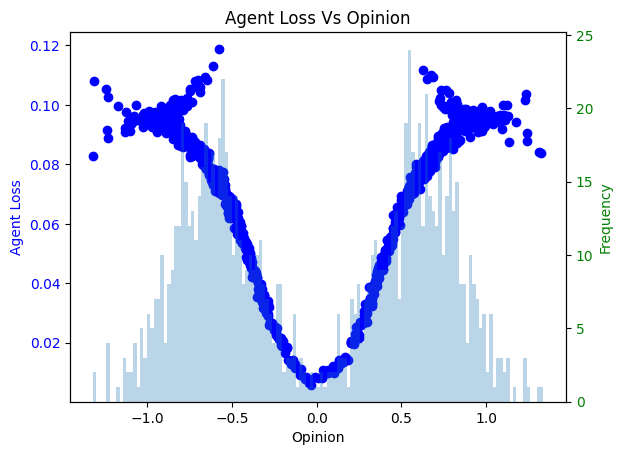

1951


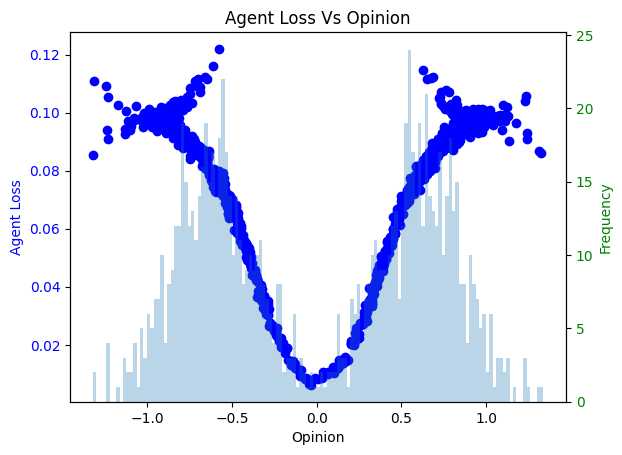

2001


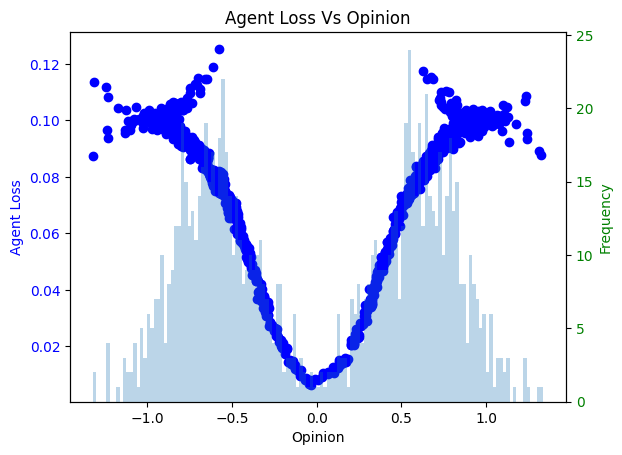

2051


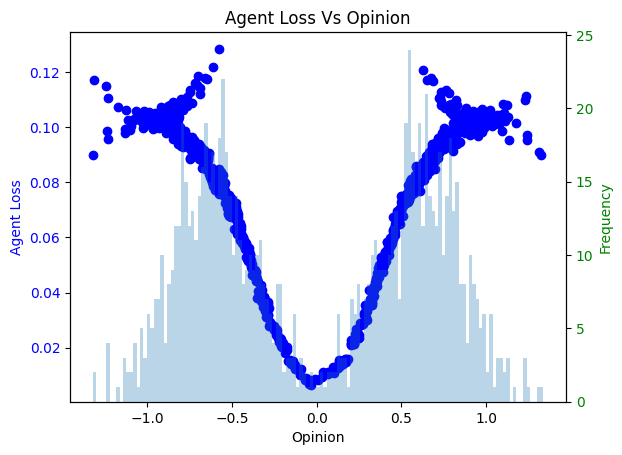

2101


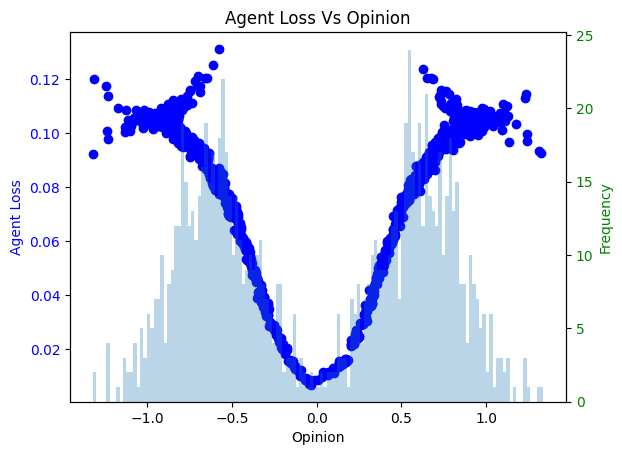

2151


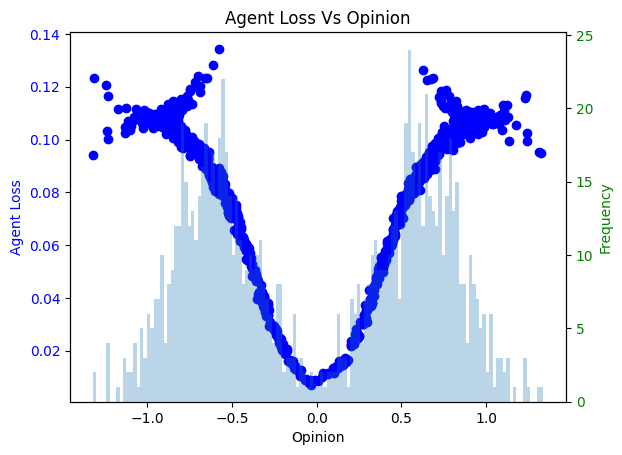

2201


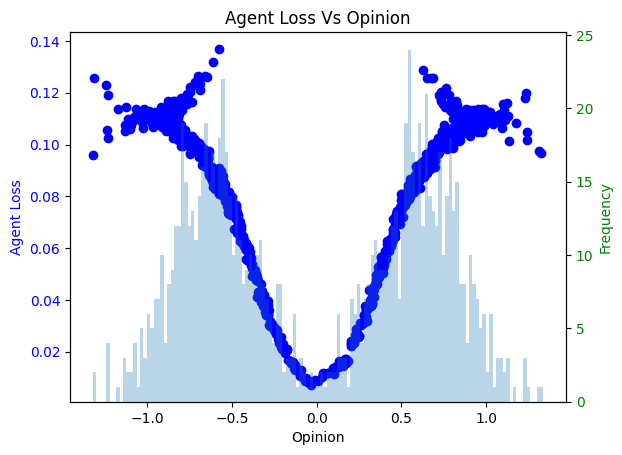

2251


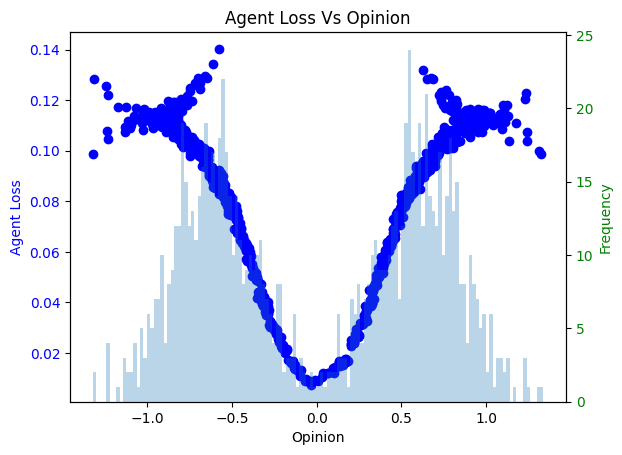

2301


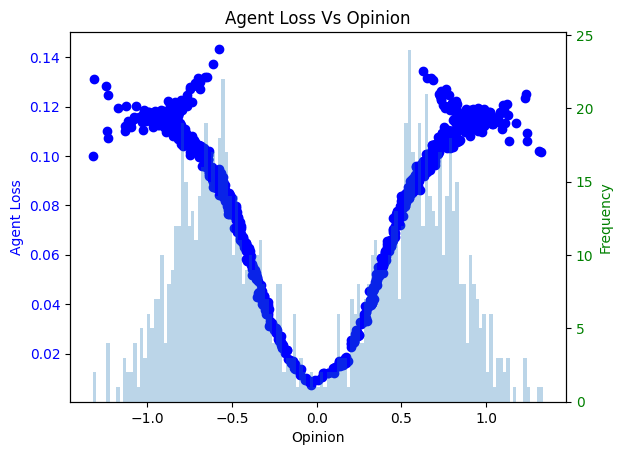

2351


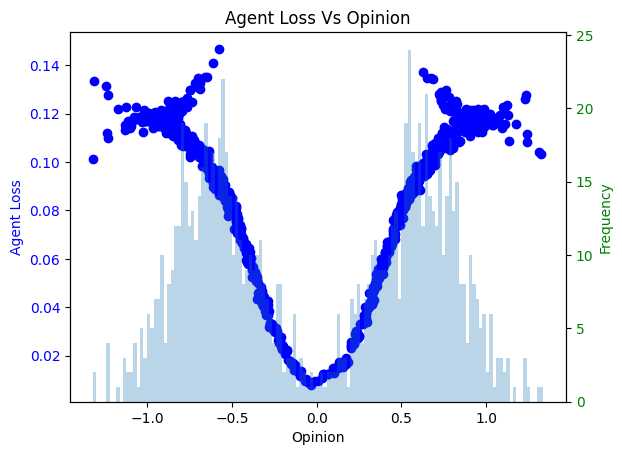

2401


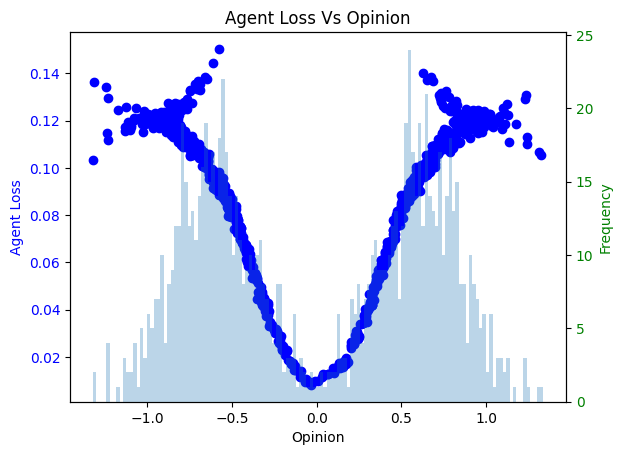

2451


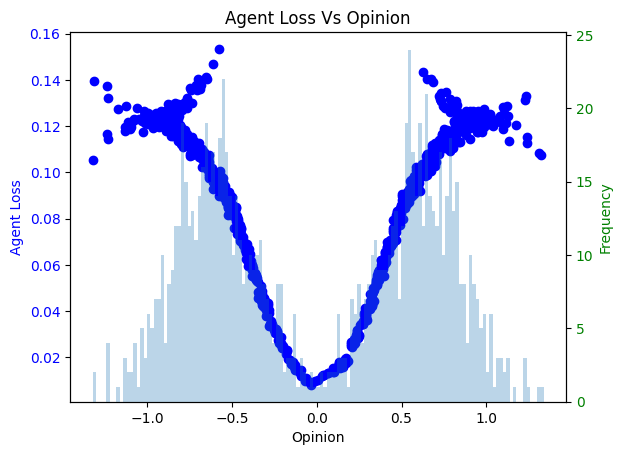

2501


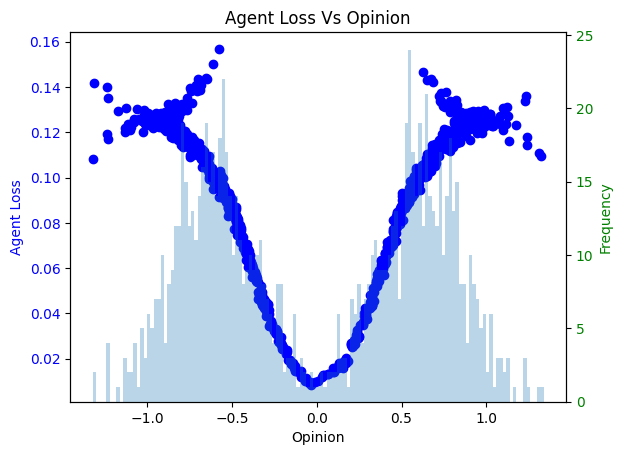

2551


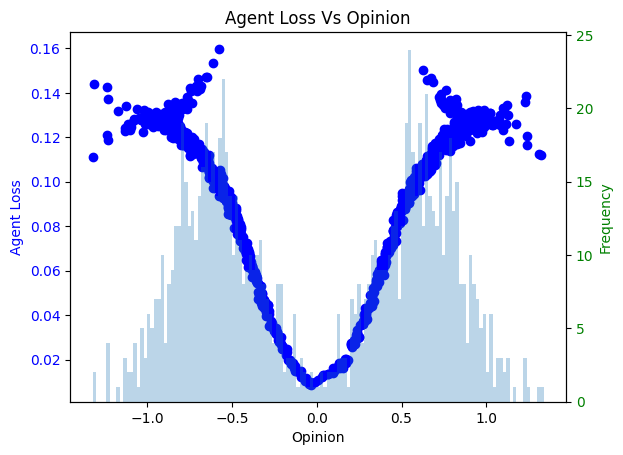

2601


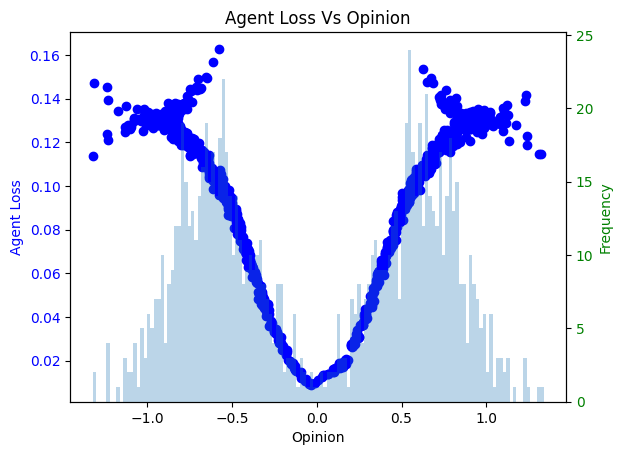

2651


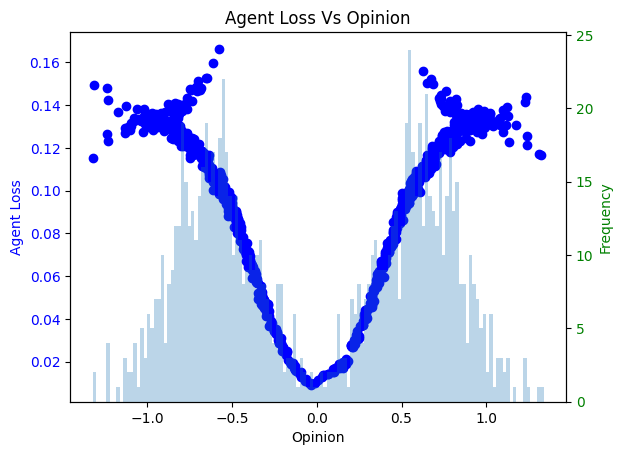

2701


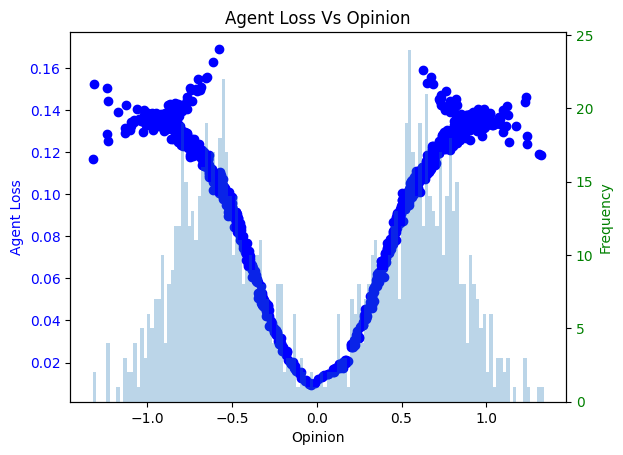

2751


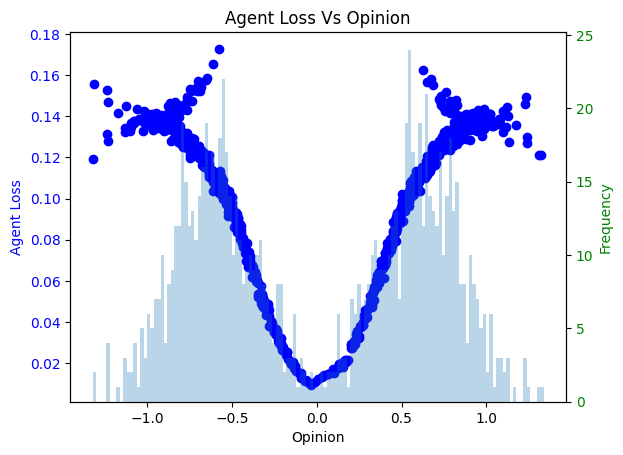

2801


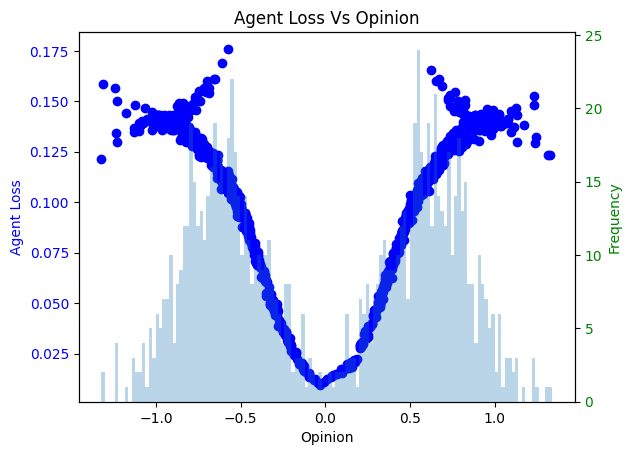

2851


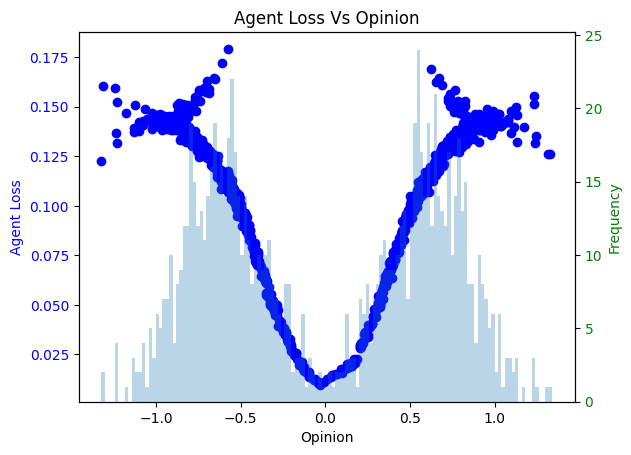

2901


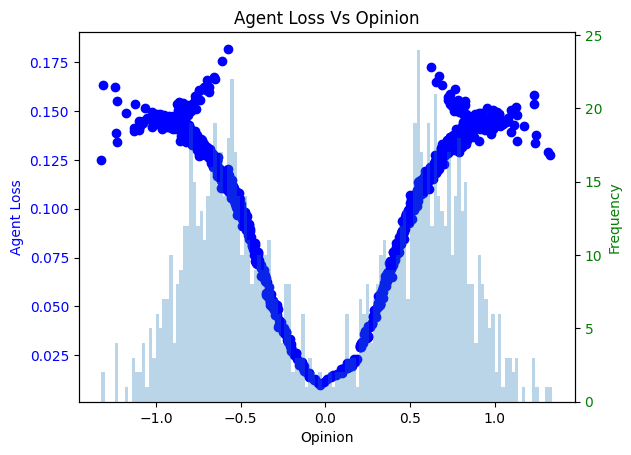

2951


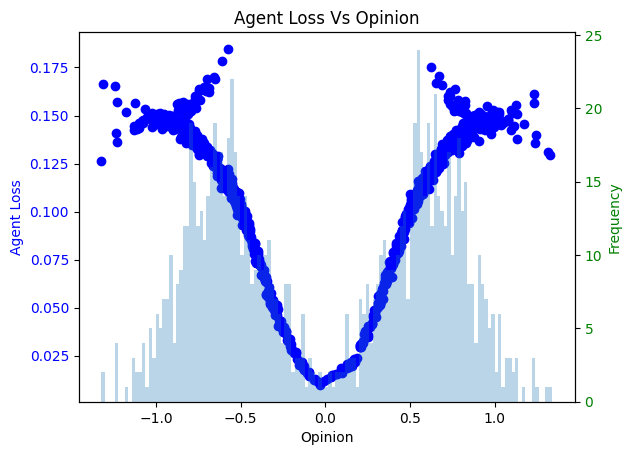

3001


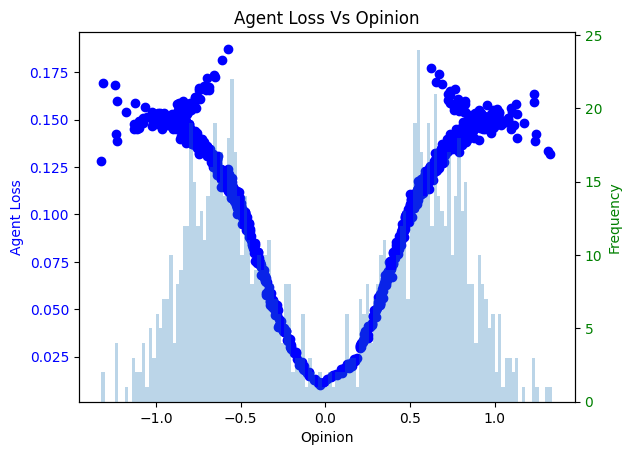

3051


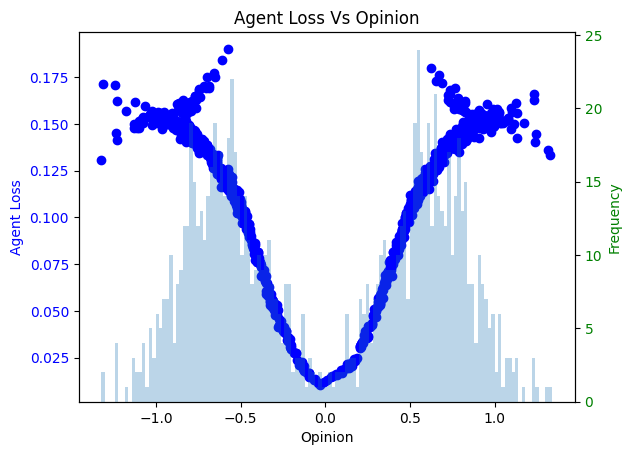

3101


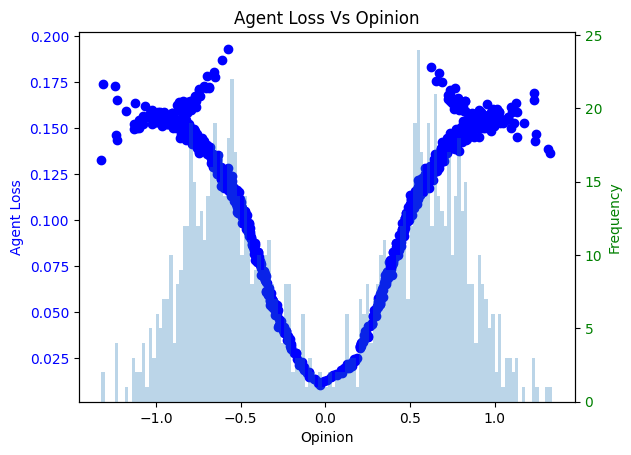

3151


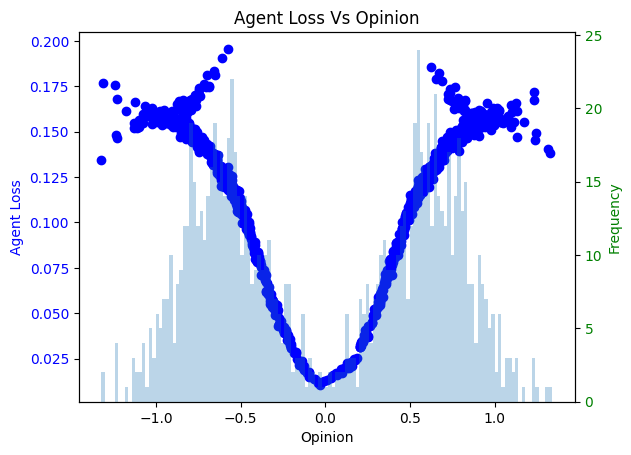

3201


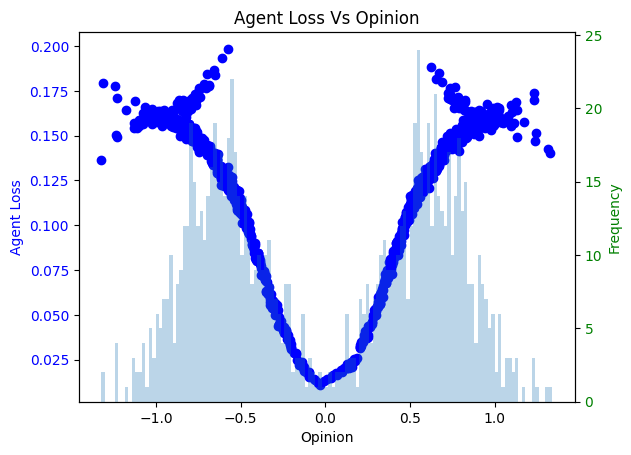

3251


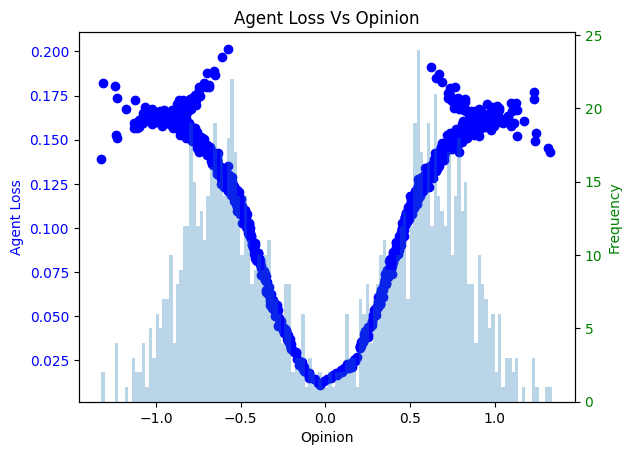

3301


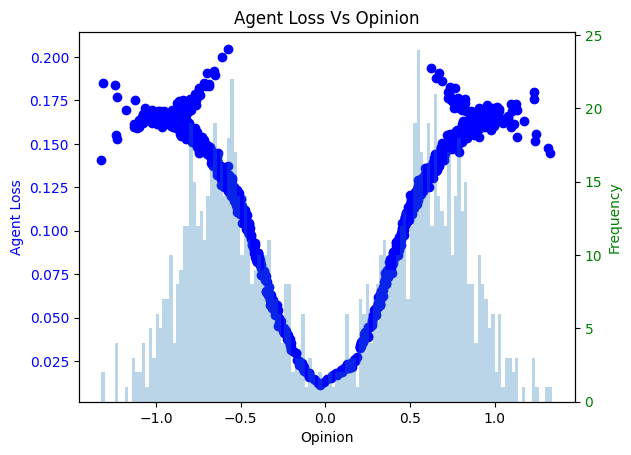

3351


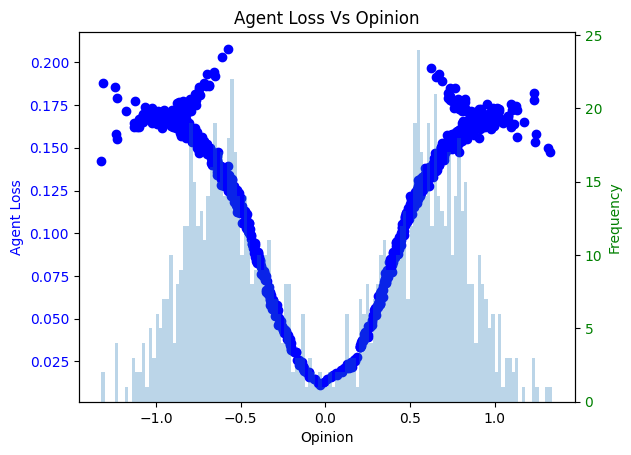

3401


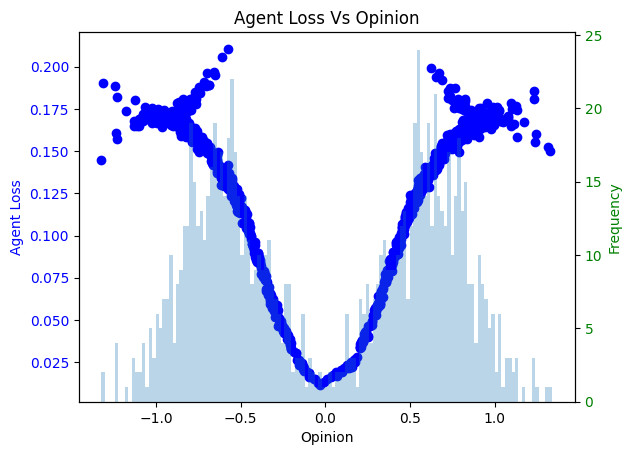

3451


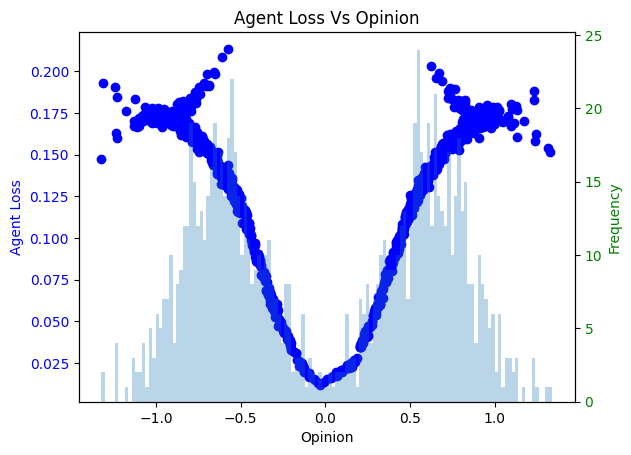

3501


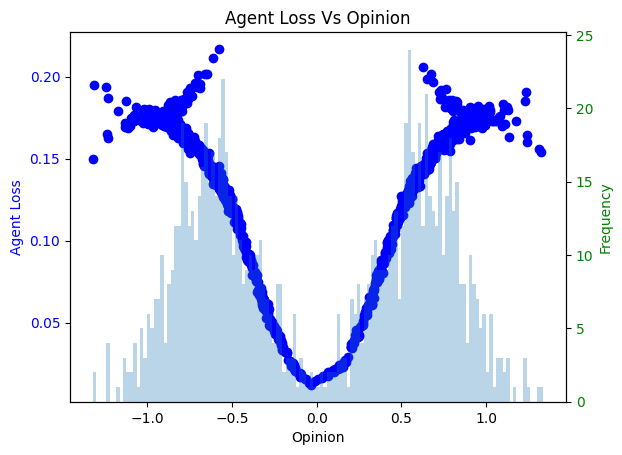

3551


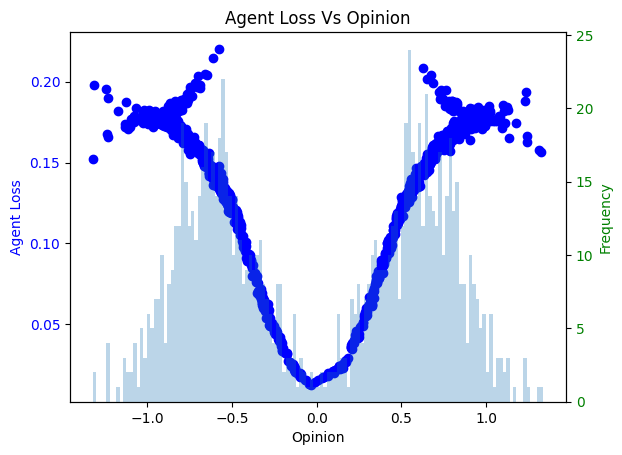

3601


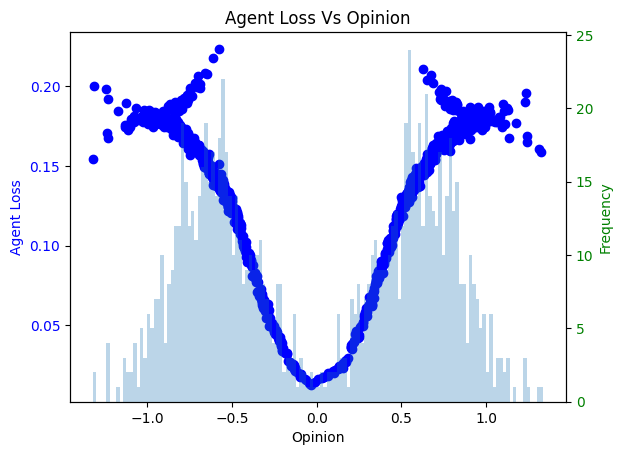

3651


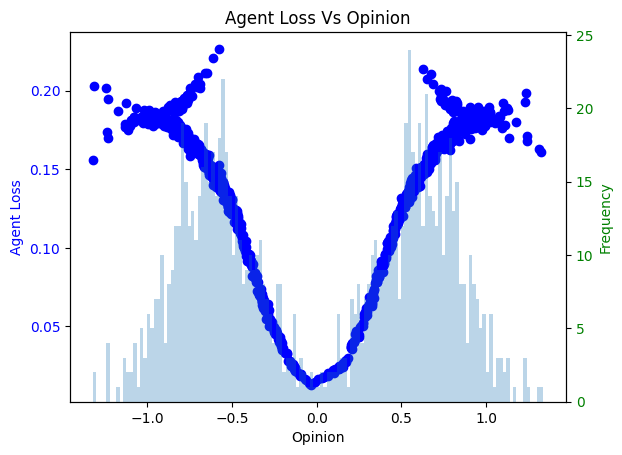

3701


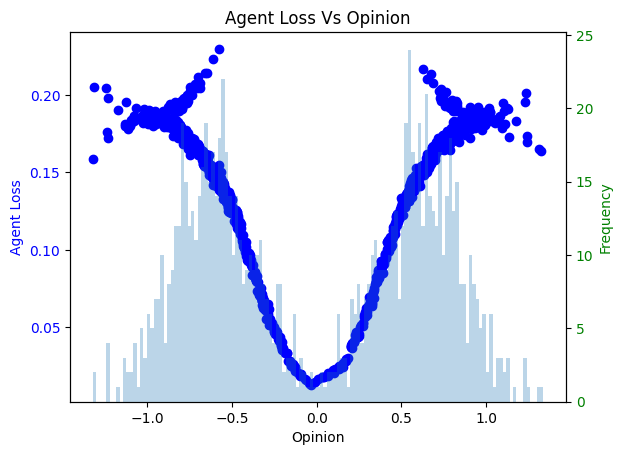

3751


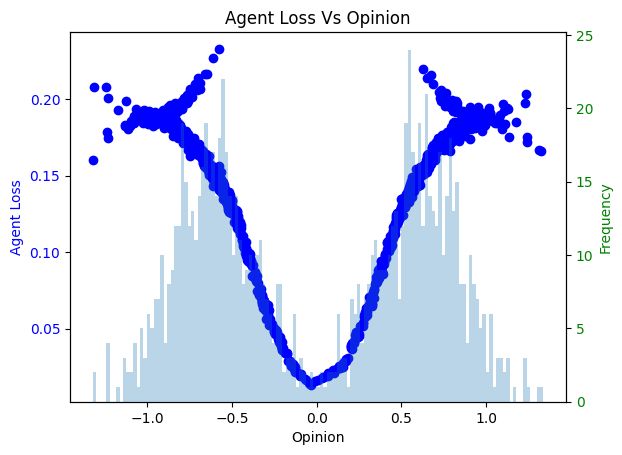

3801


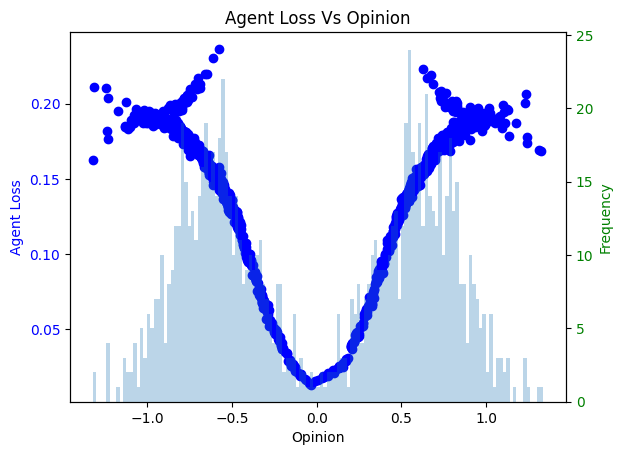

3851


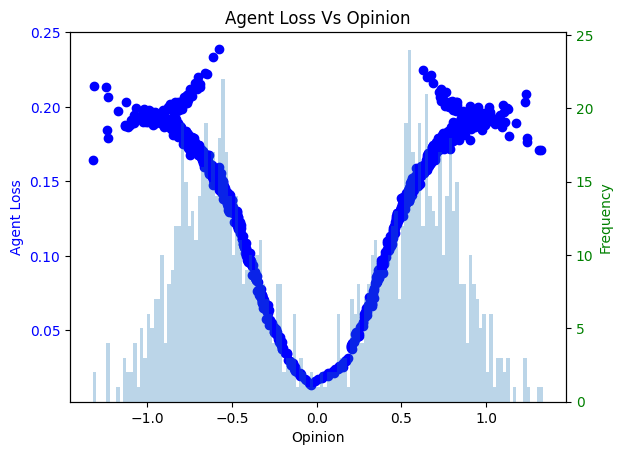

3901


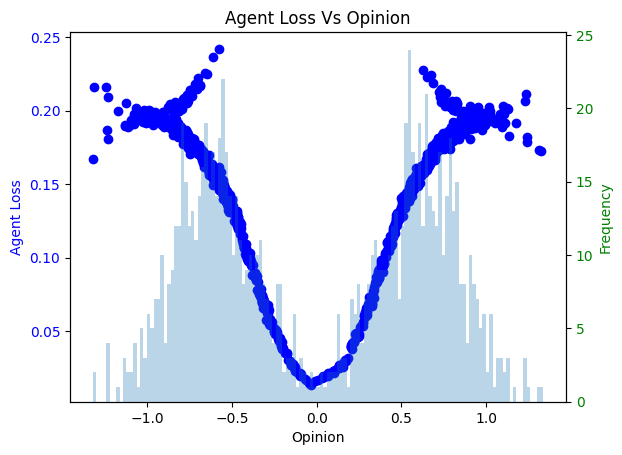

3951


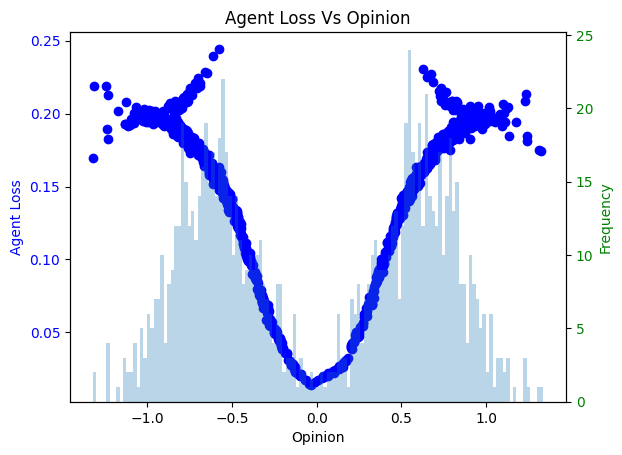

4001


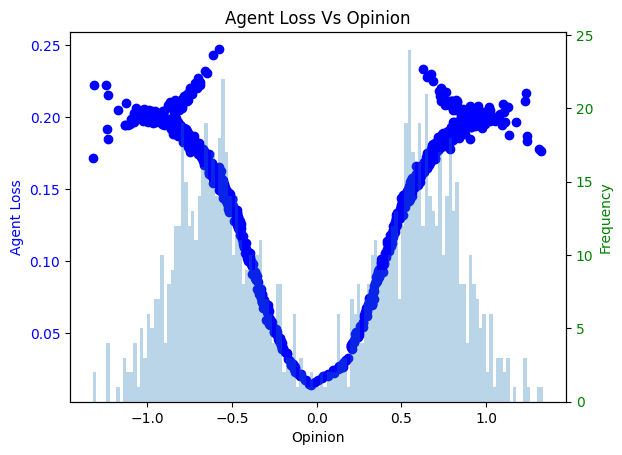

4051


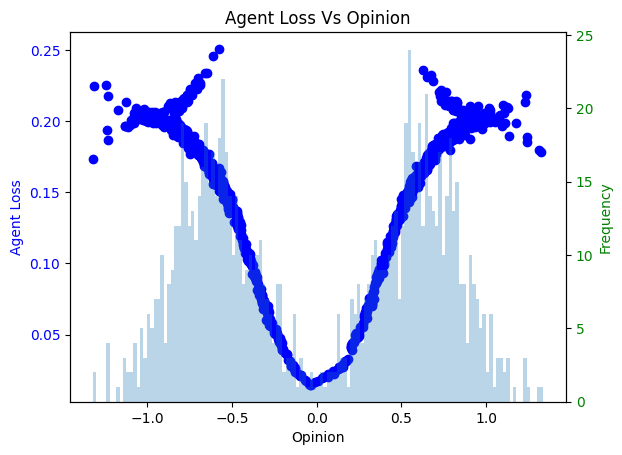

4101


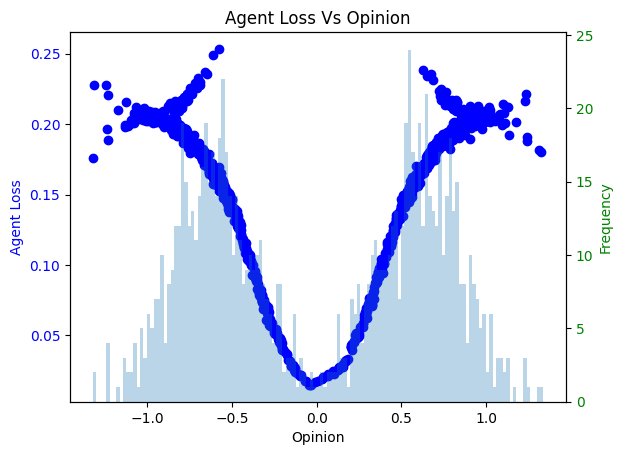

4151


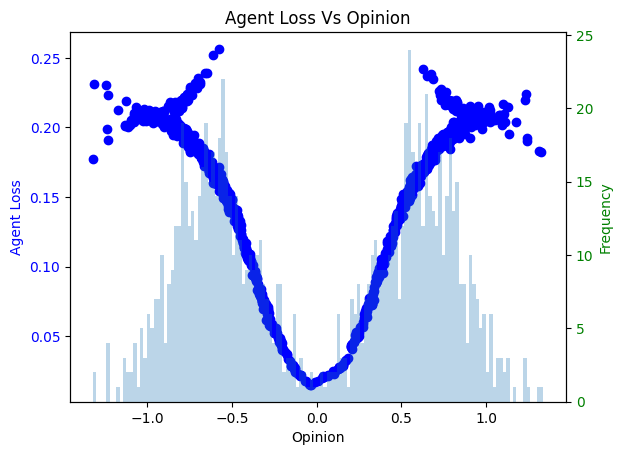

4201


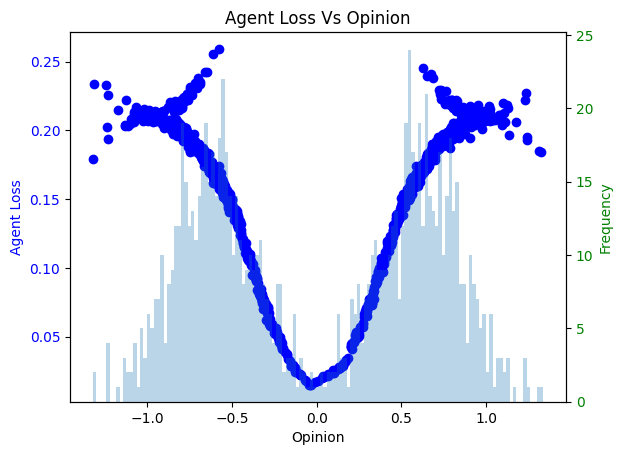

4251


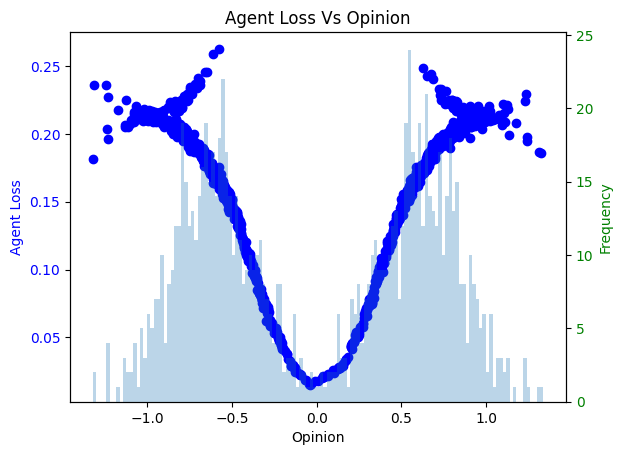

4301


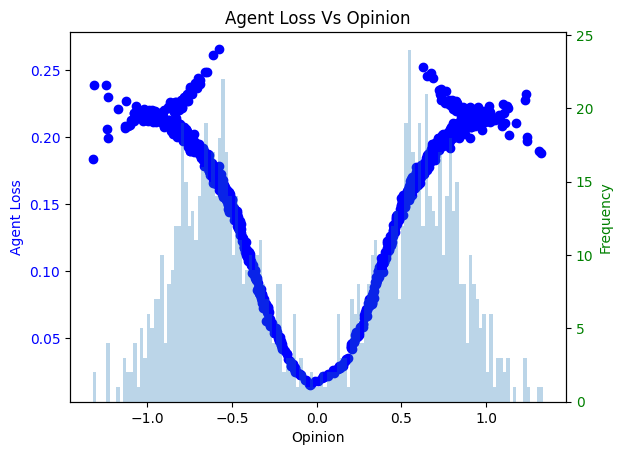

4351


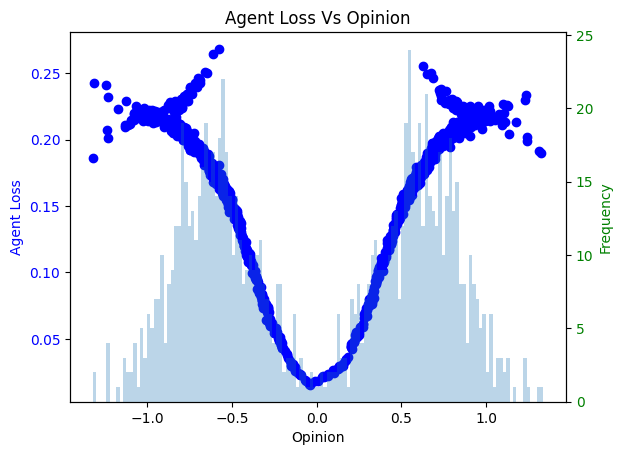

4401


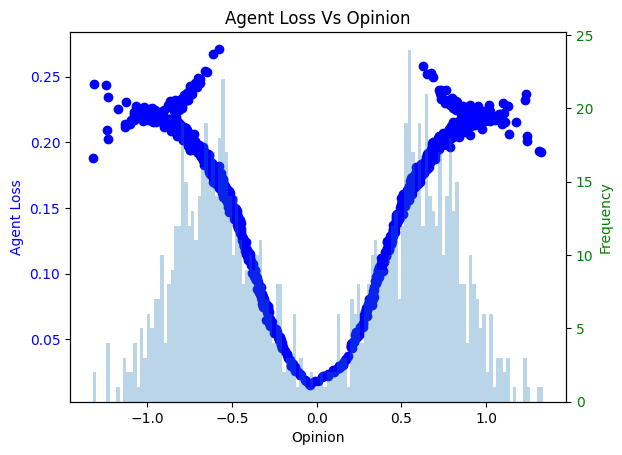

4451


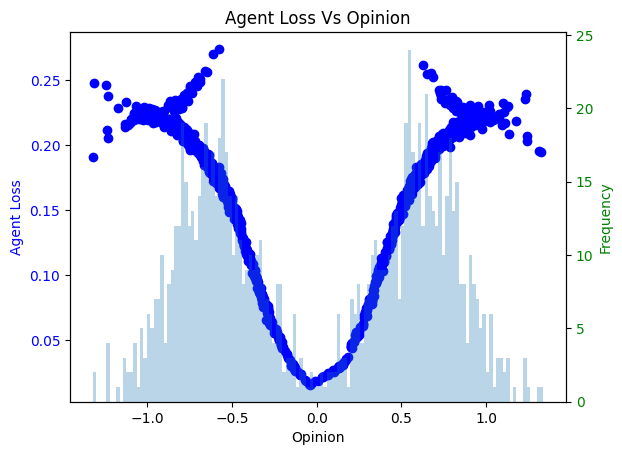

4501


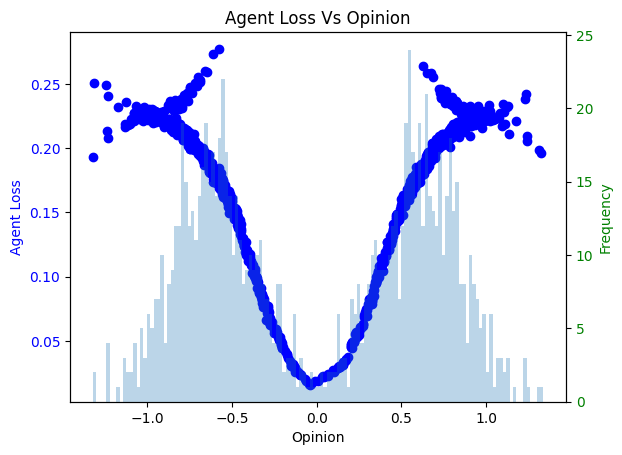

4551


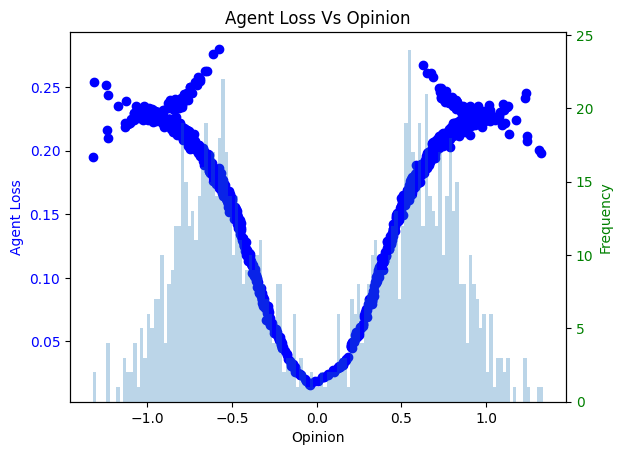

4601


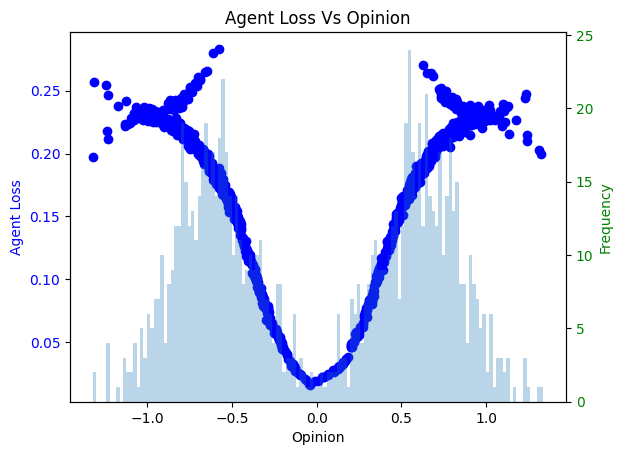

4651


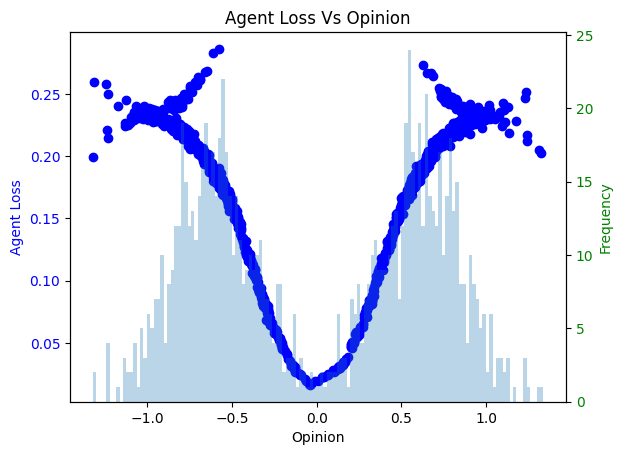

4701


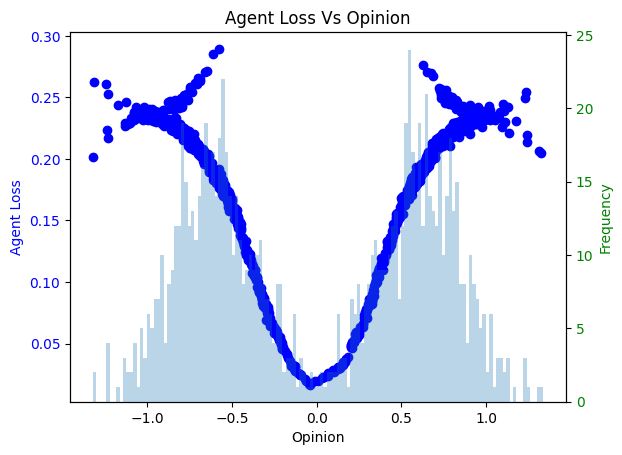

4751


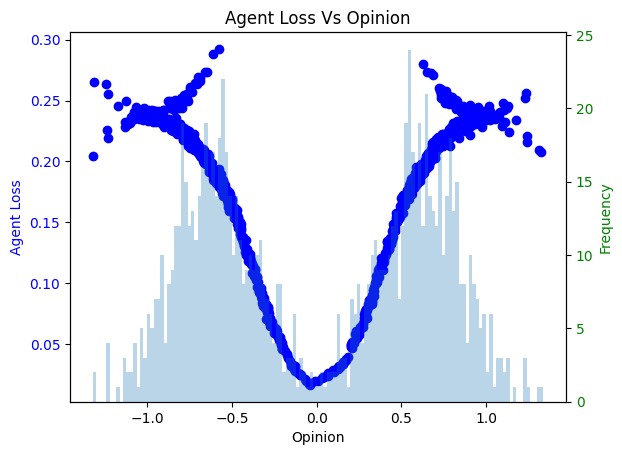

4801


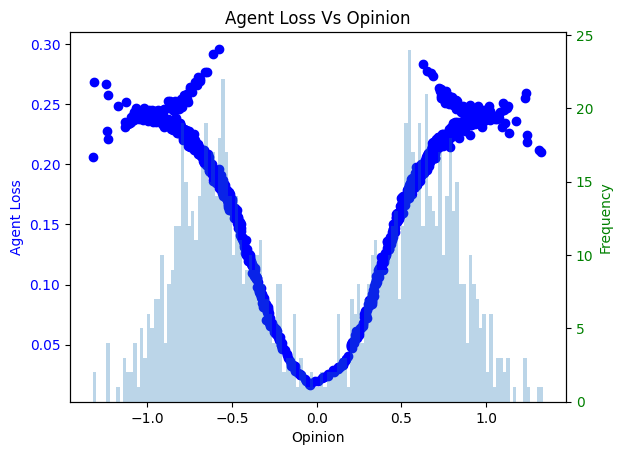

4851


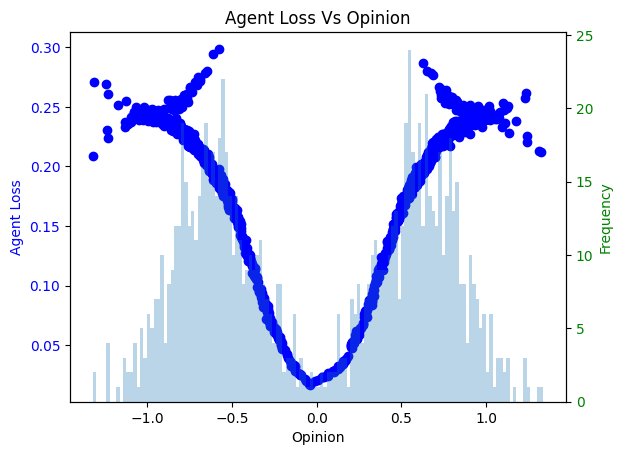

4901


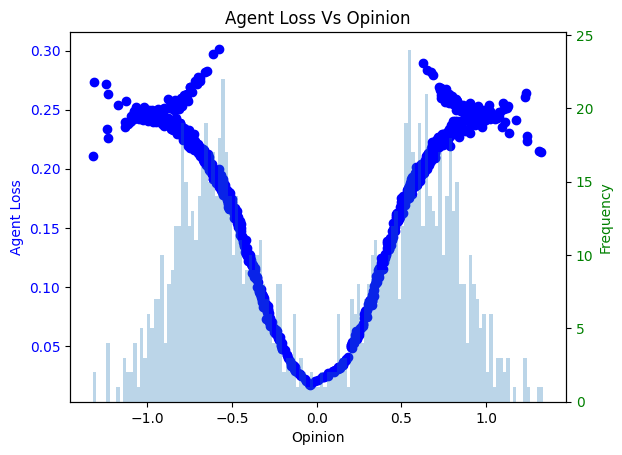

4951


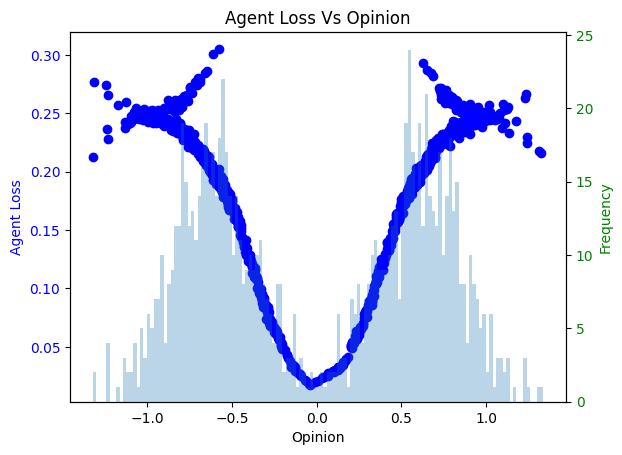

5001


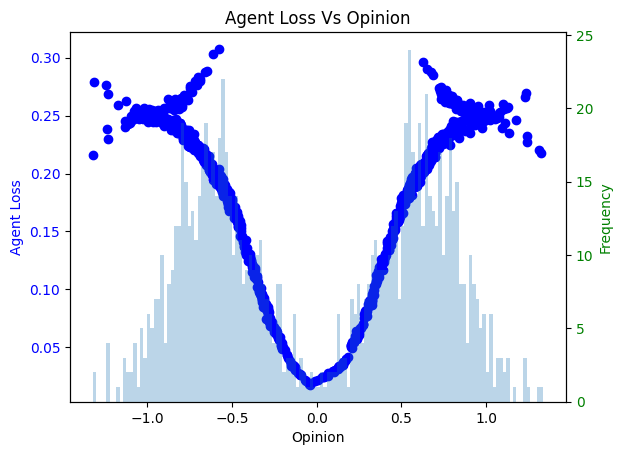

5051


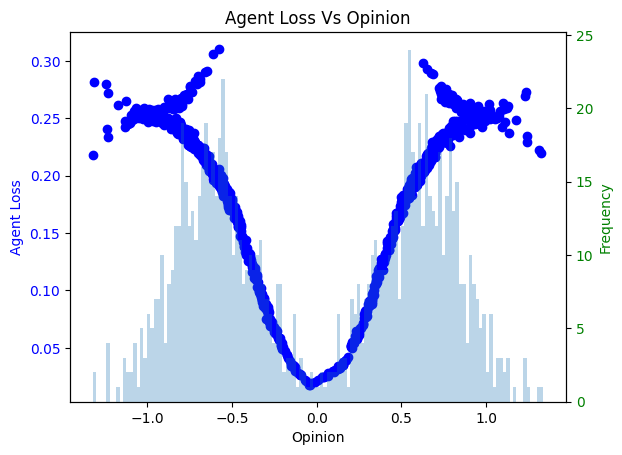

5101


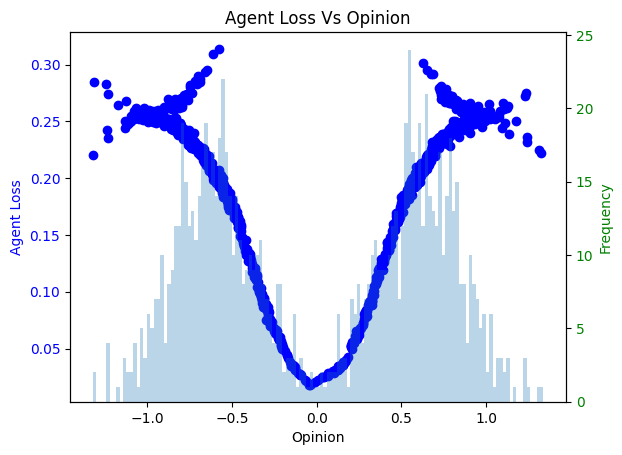

5151


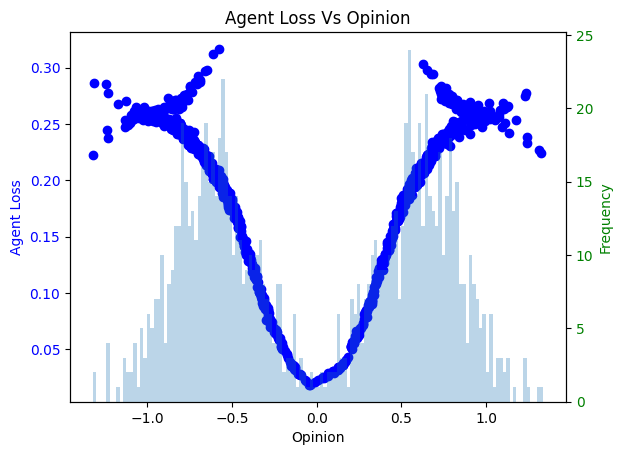

5201


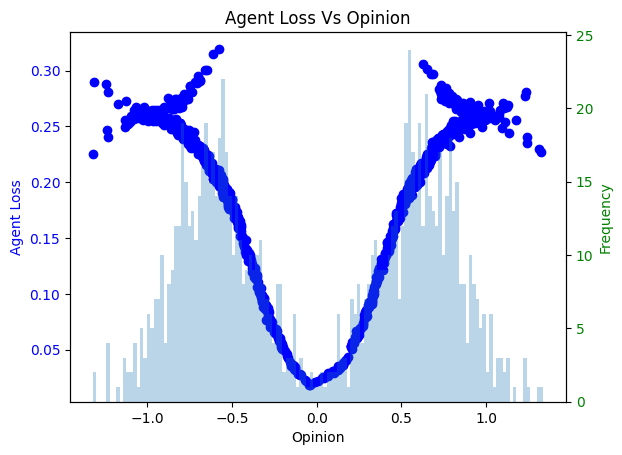

5251


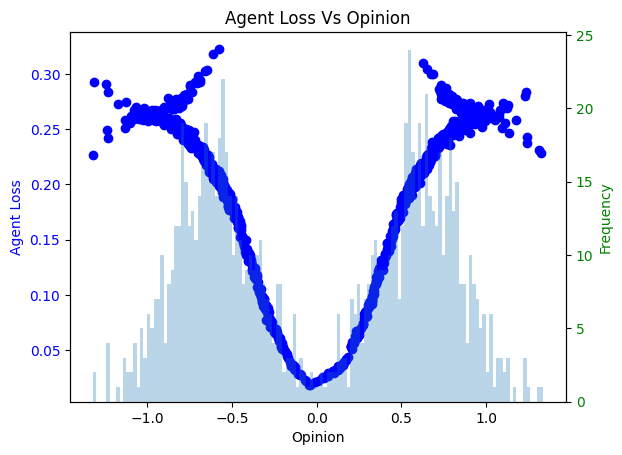

5301


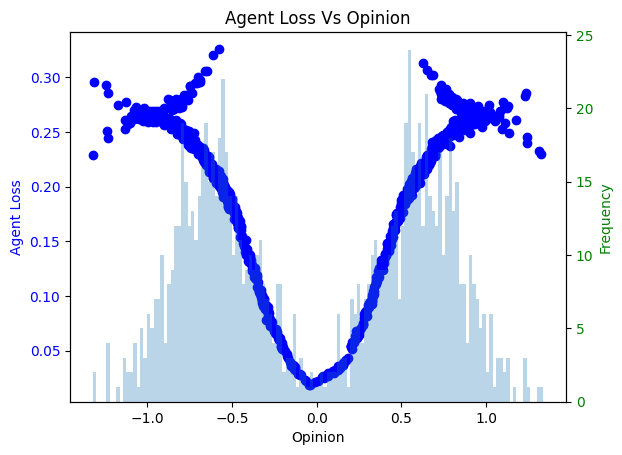

5351


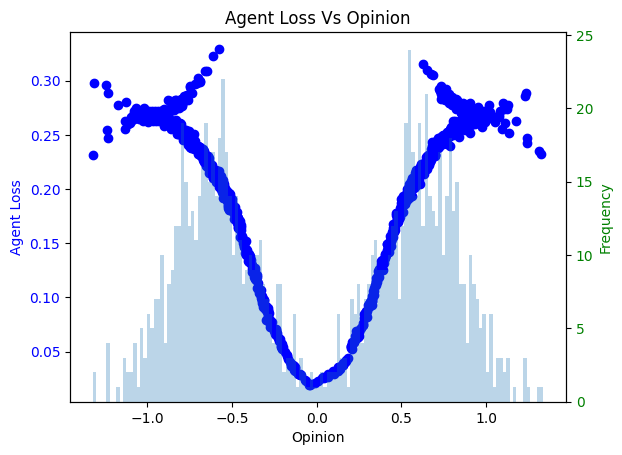

5401


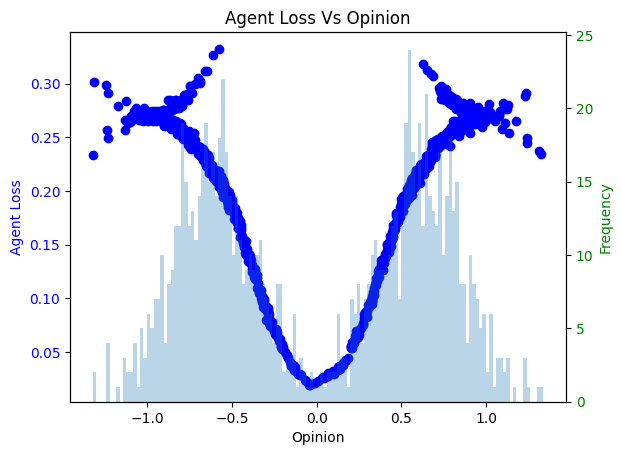

5451


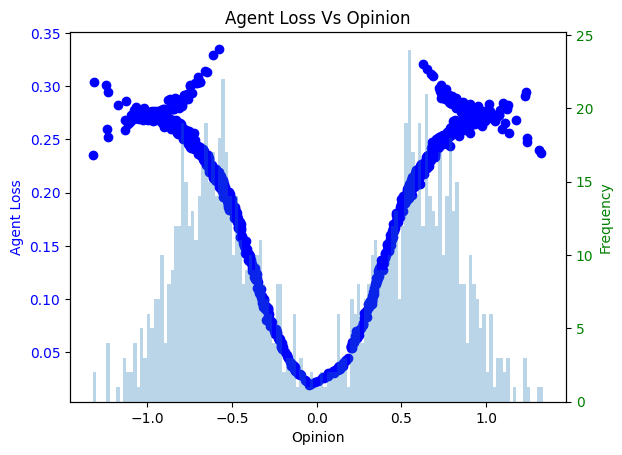

5501


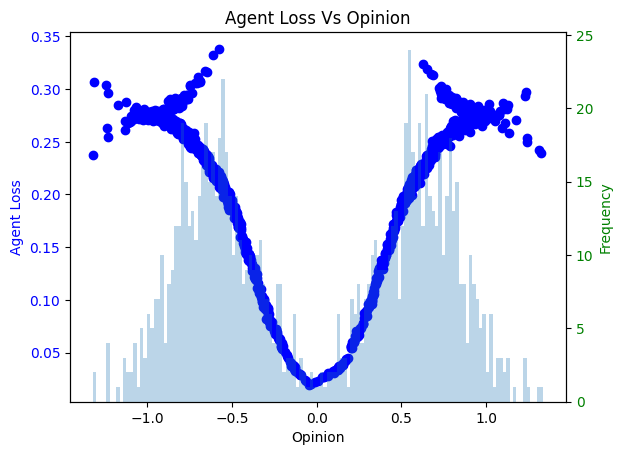

5551


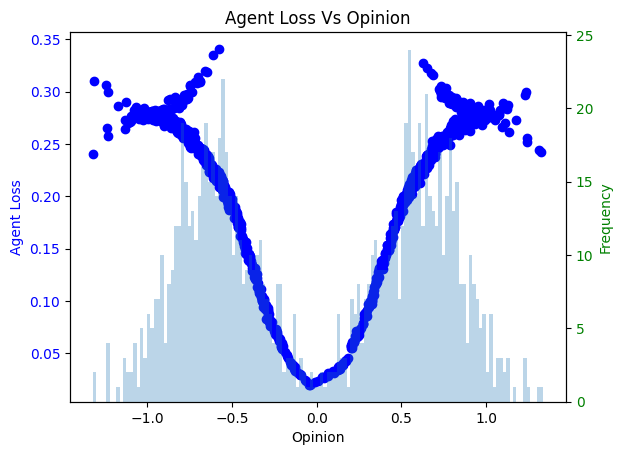

5601


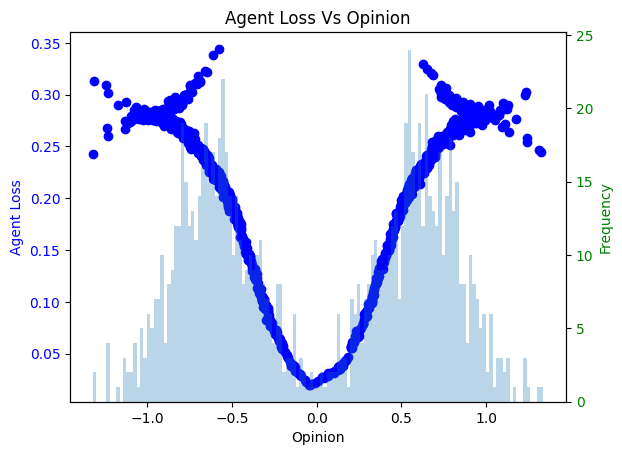

5651


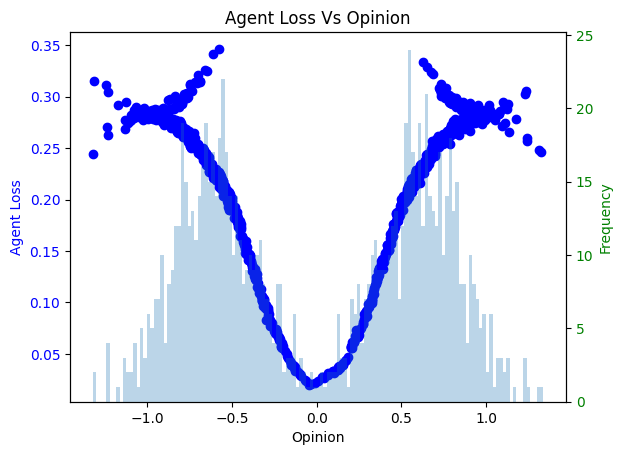

5701


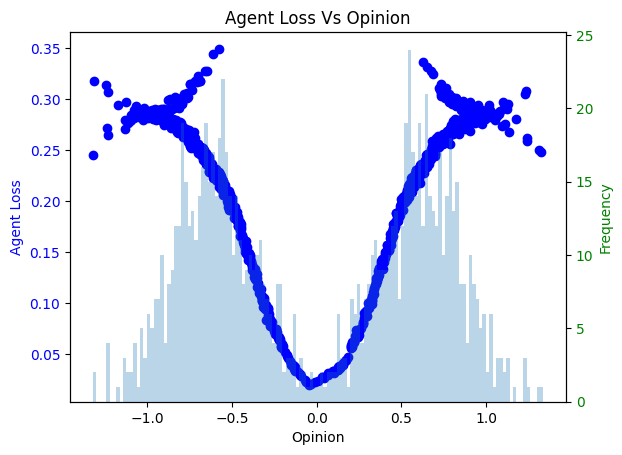

5751


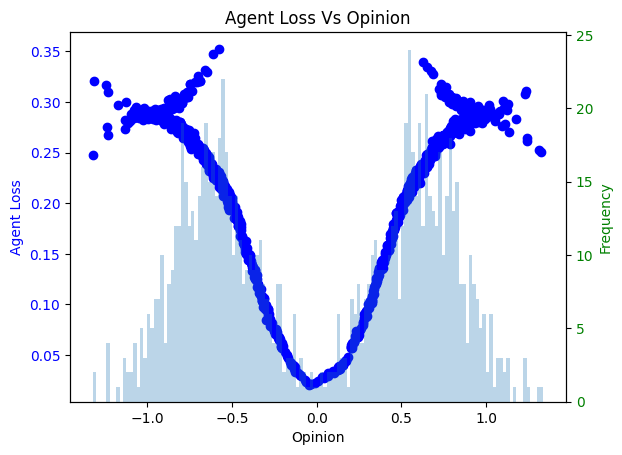

5801


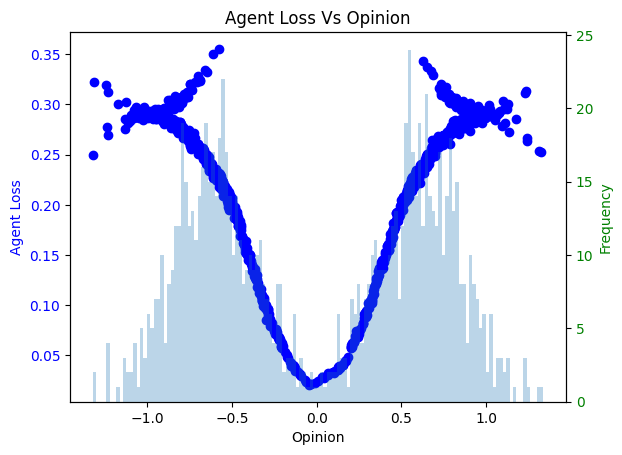

5851


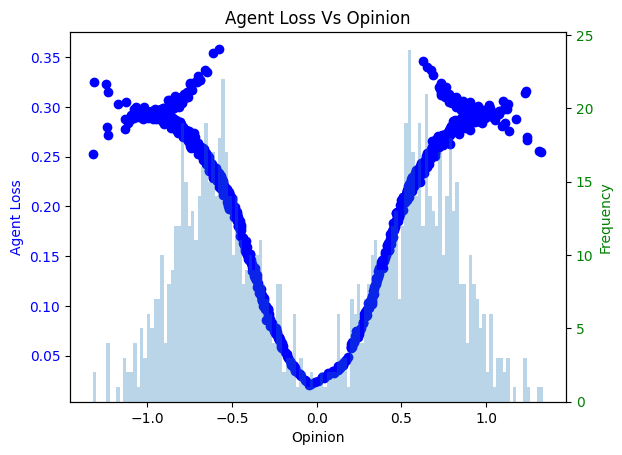

5901


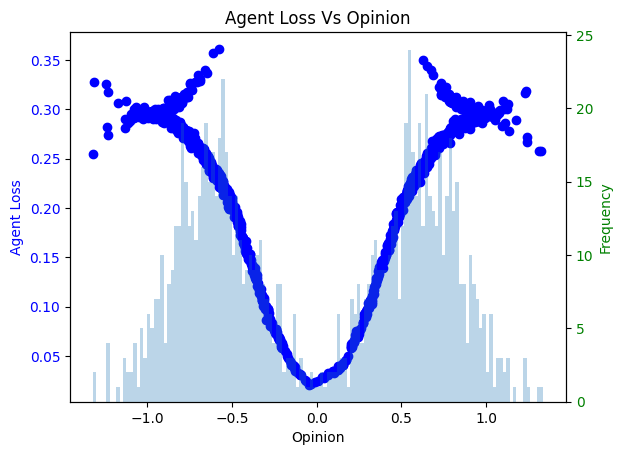

5951


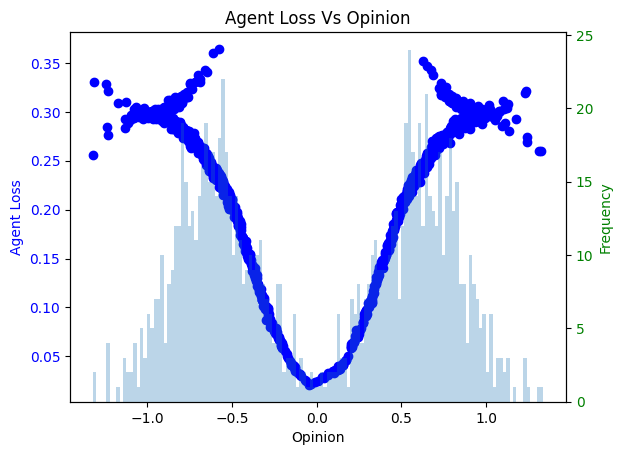

6001


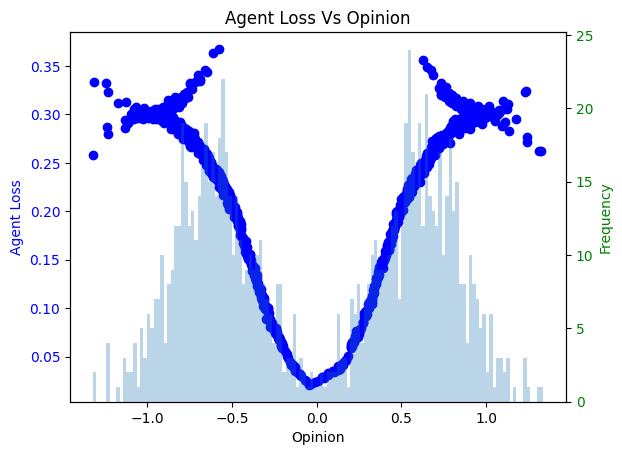

6051


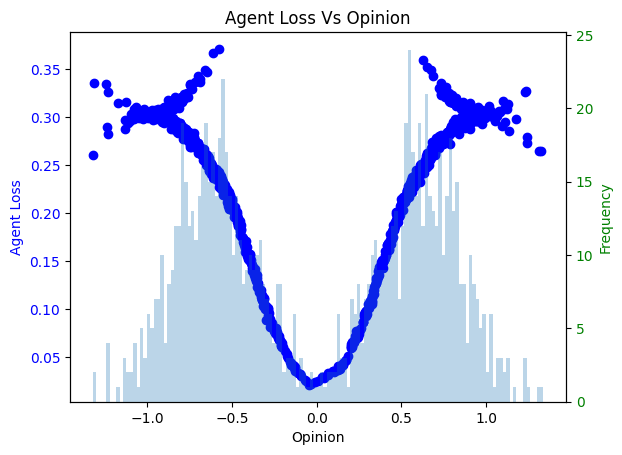

6101


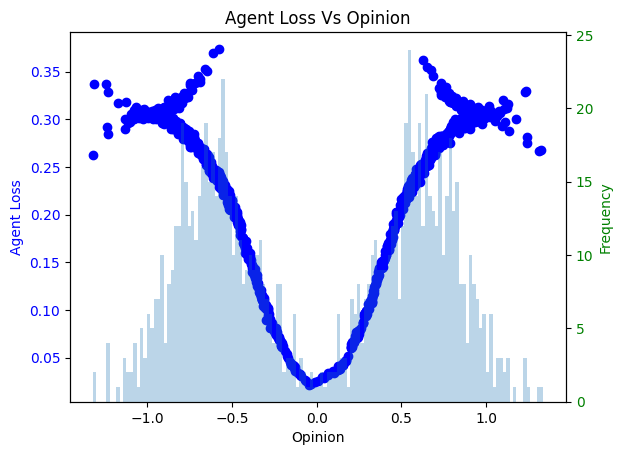

6151


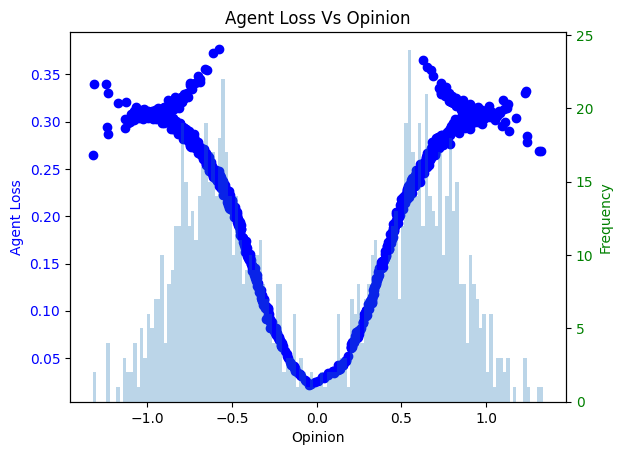

6201


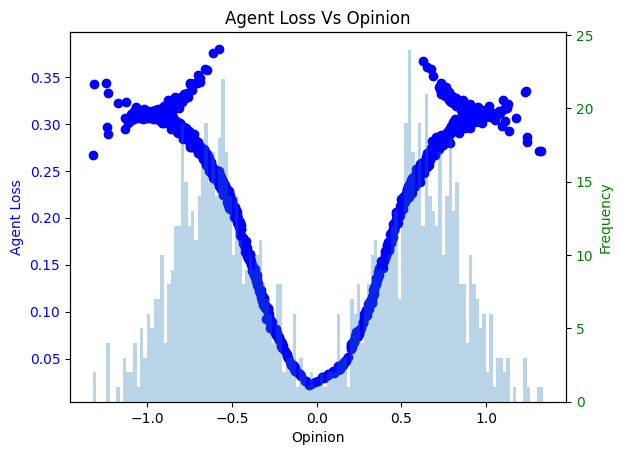

6251


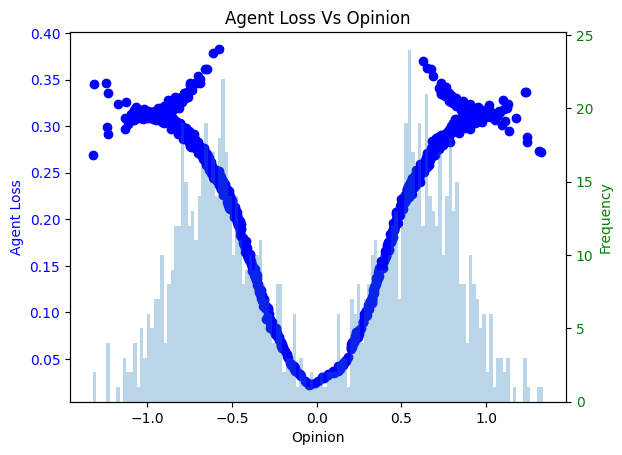

6301


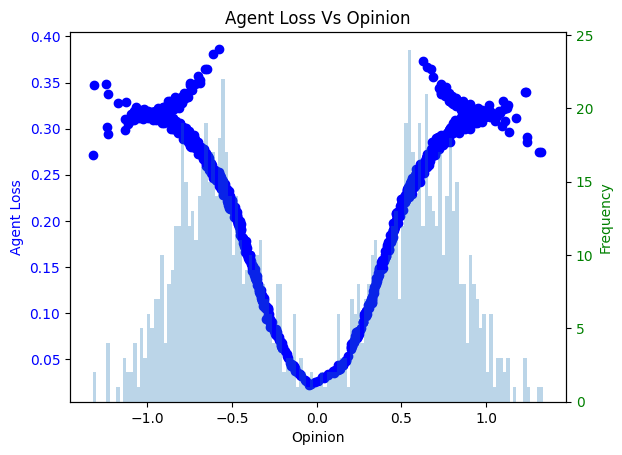

6351


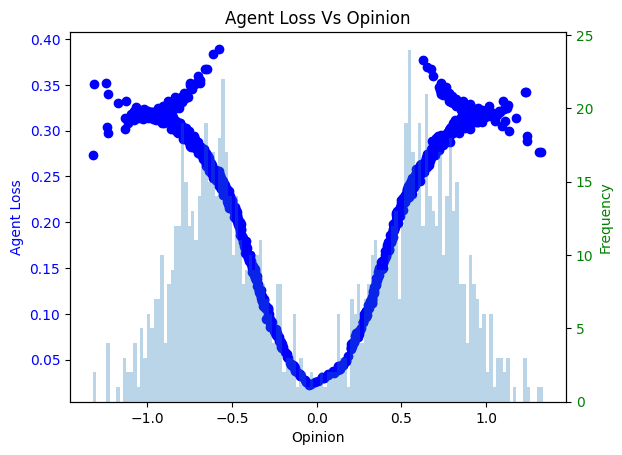

6401


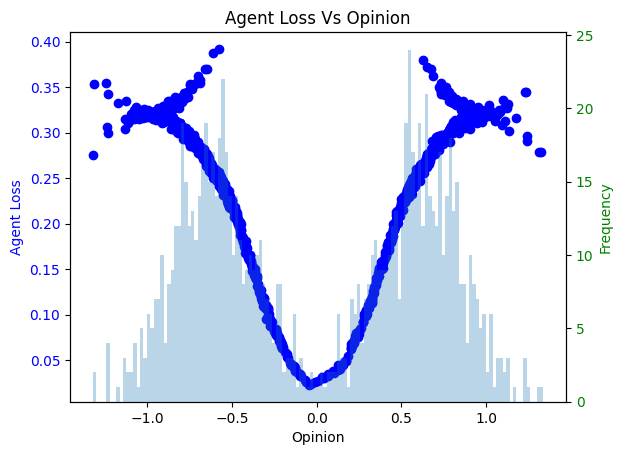

6451


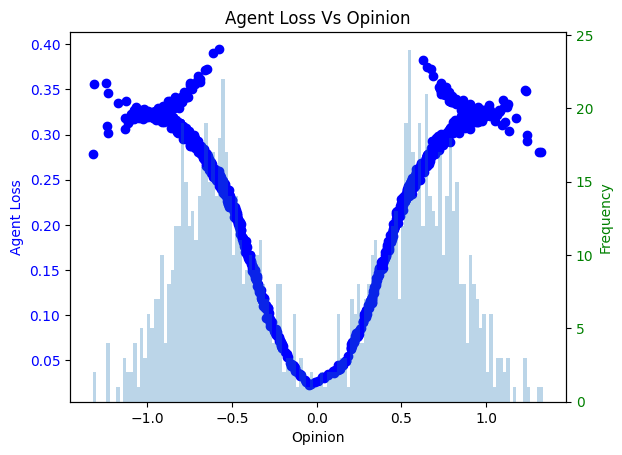

6501


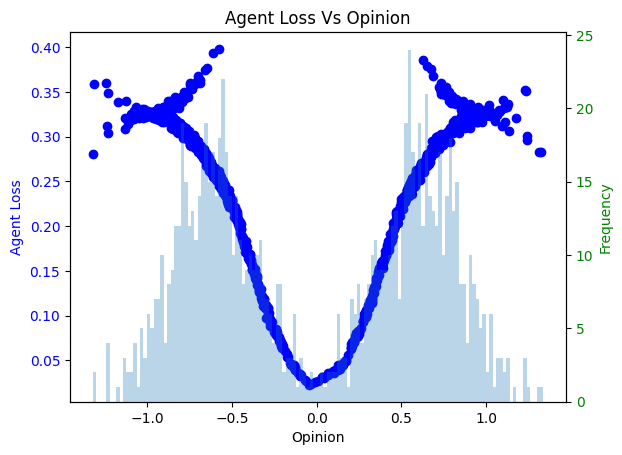

6551


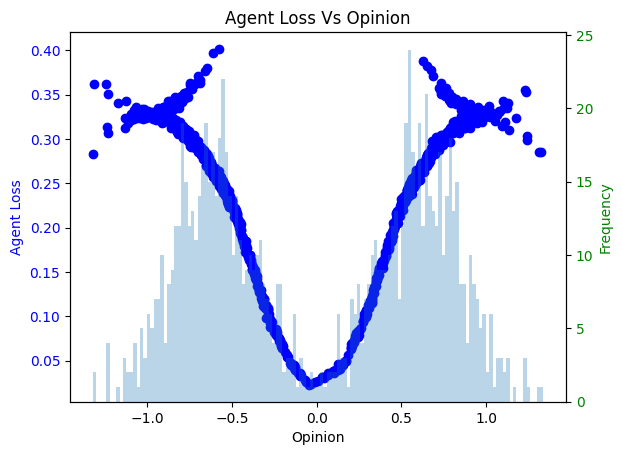

6601


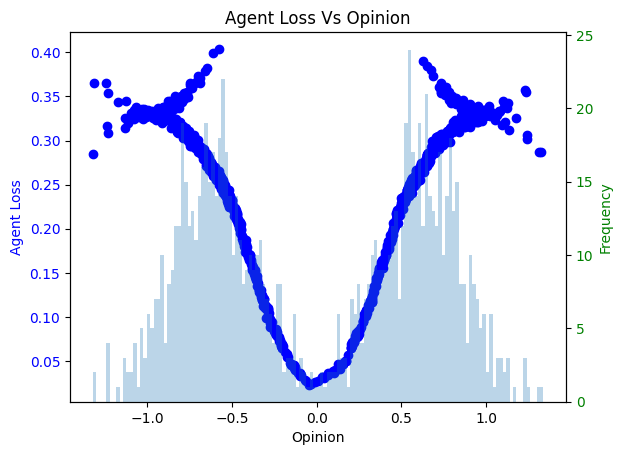

6651


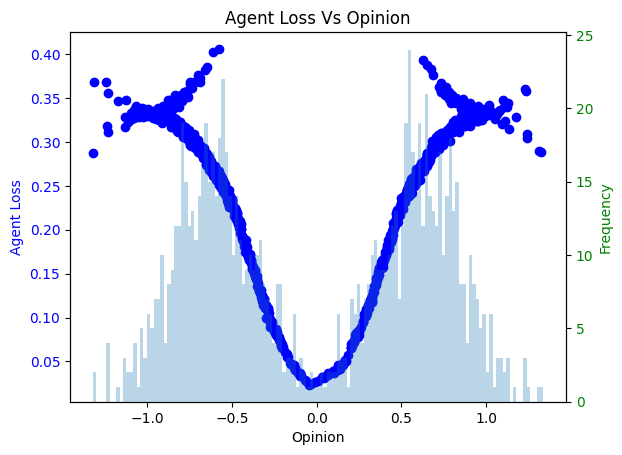

6701


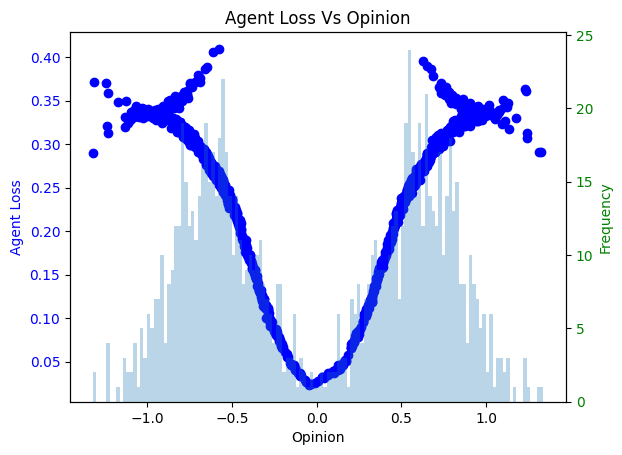

6751


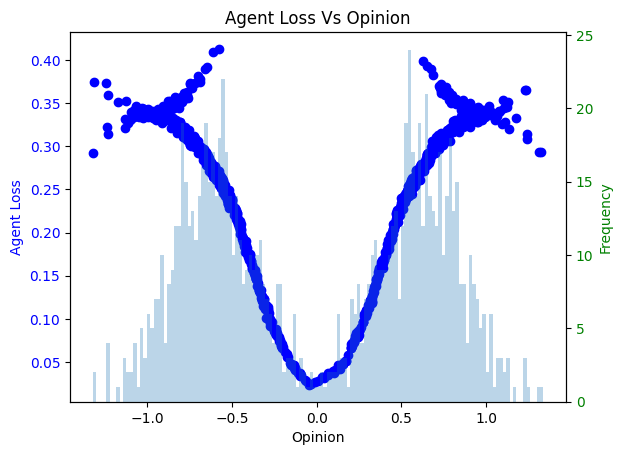

6801


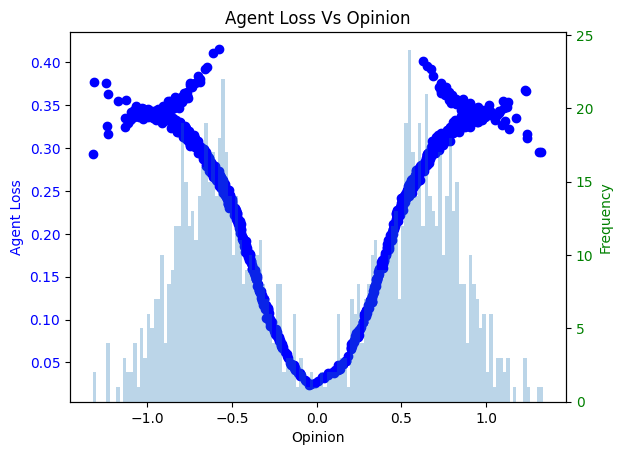

6851


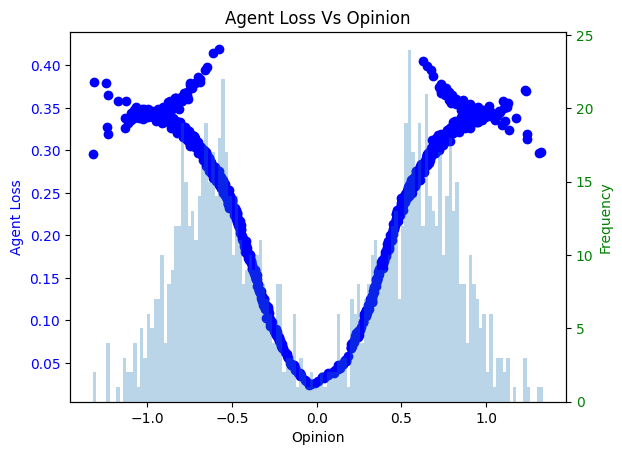

6901


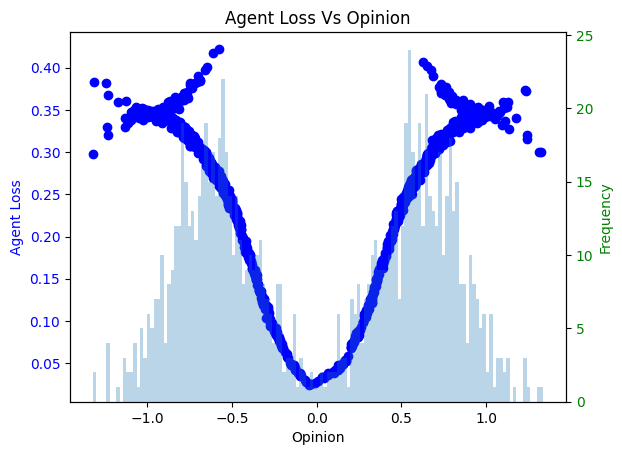

6951


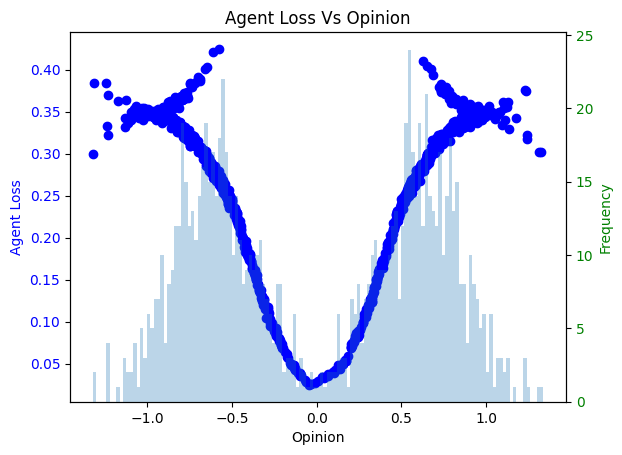

7001


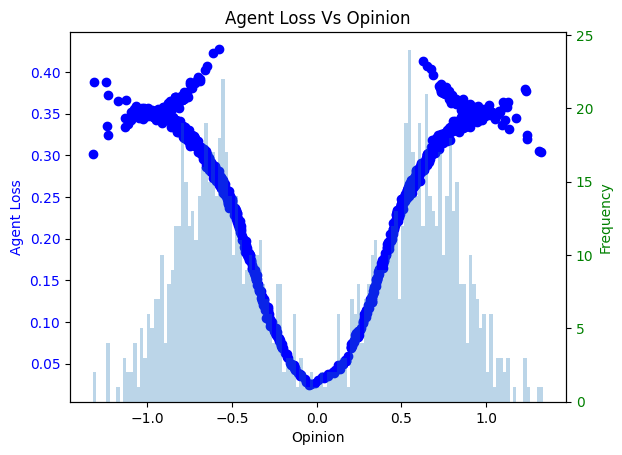

7051


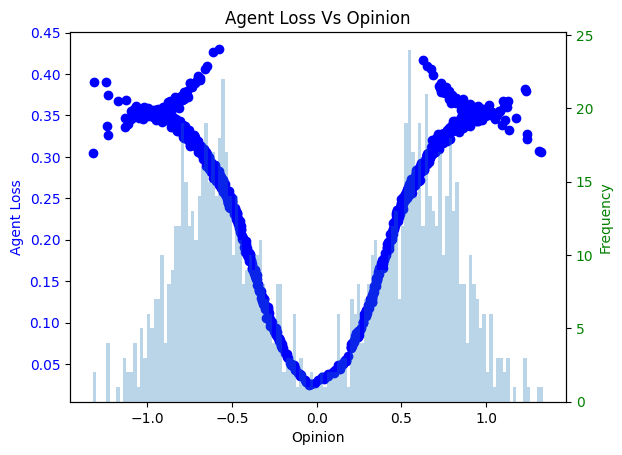

7101


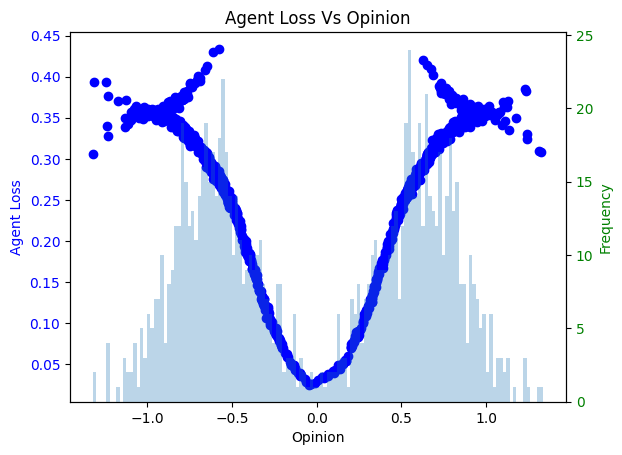

7151


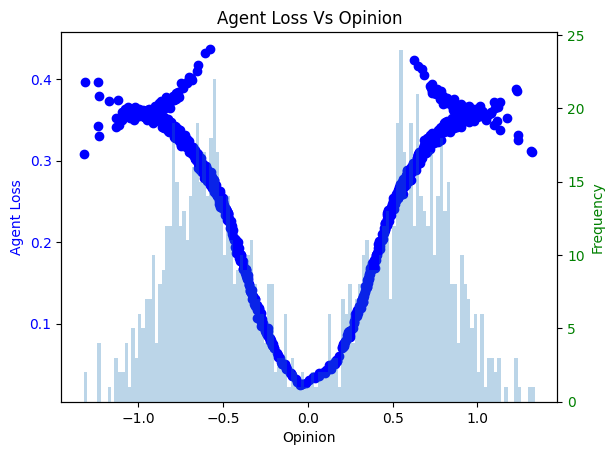

7201


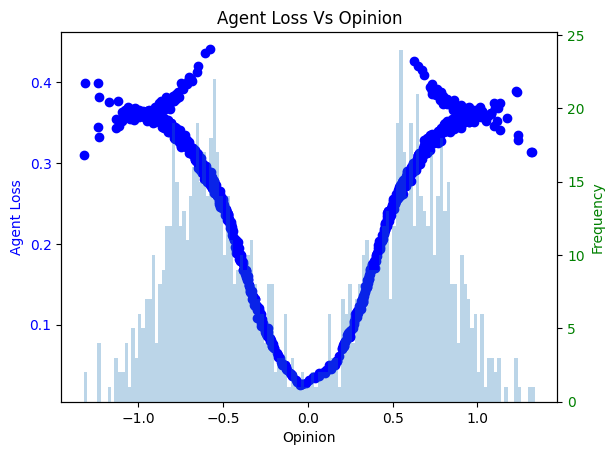

7251


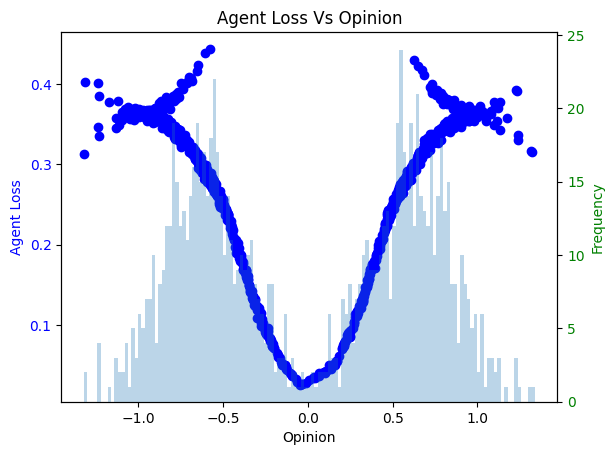

7301


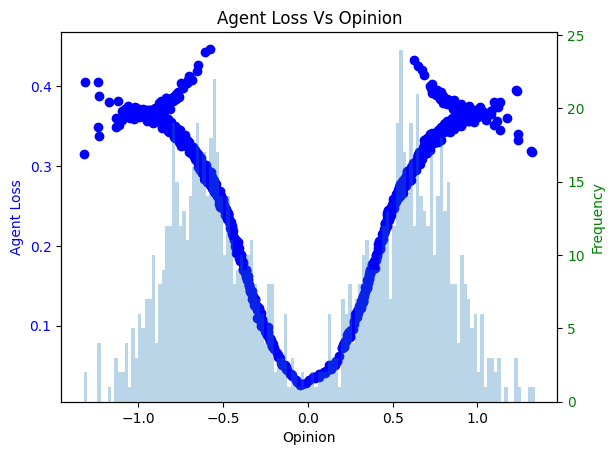

7351


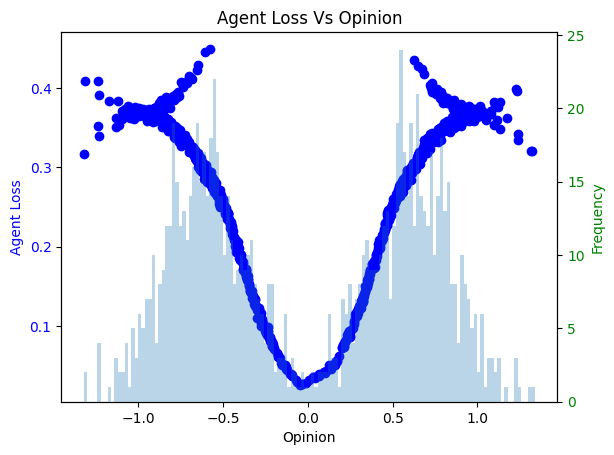

7401


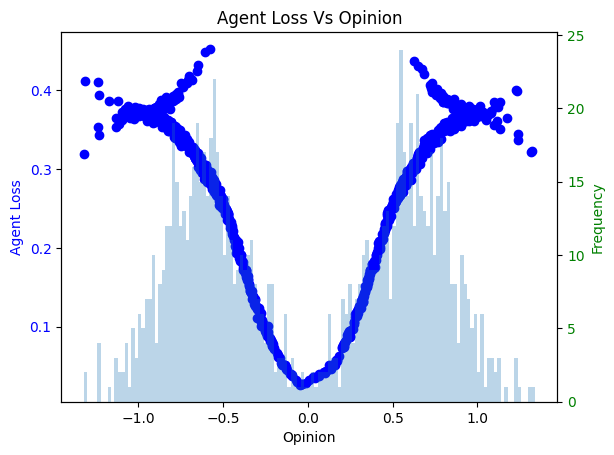

7451


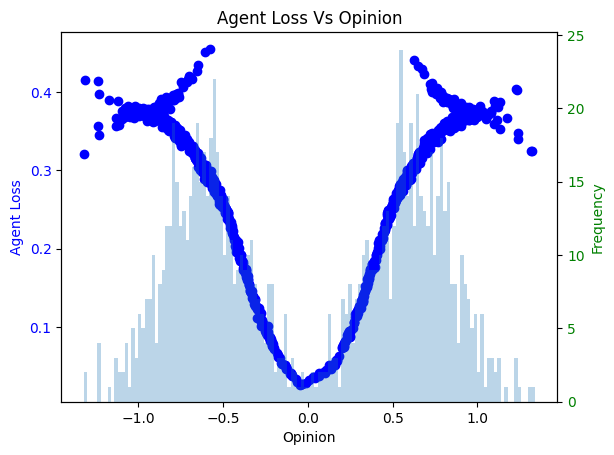

7501


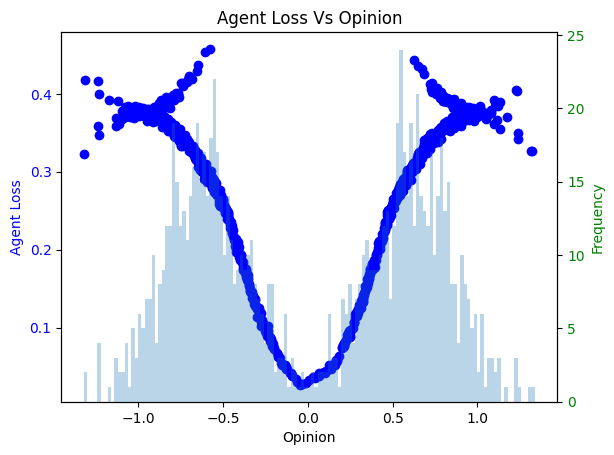

7551


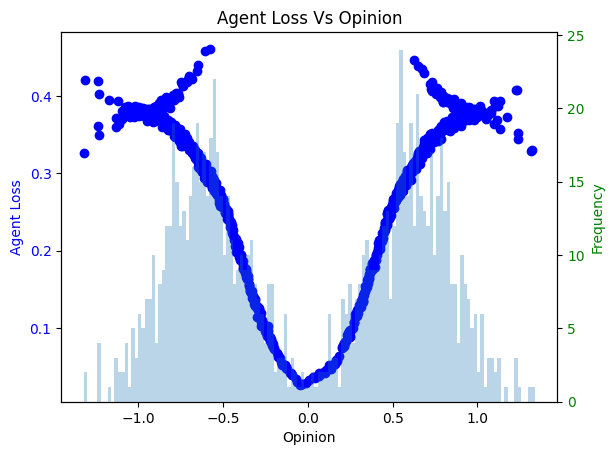

7601


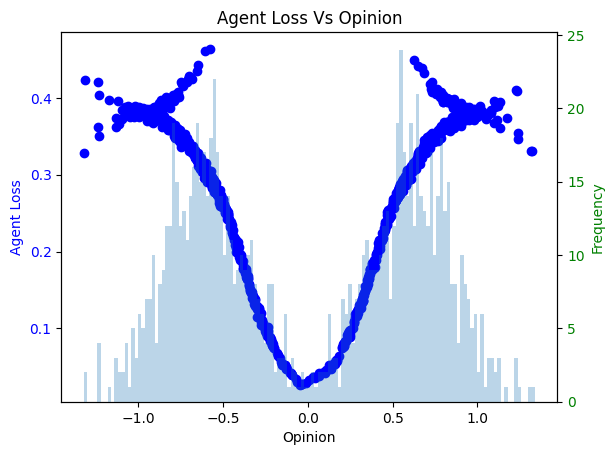

7651


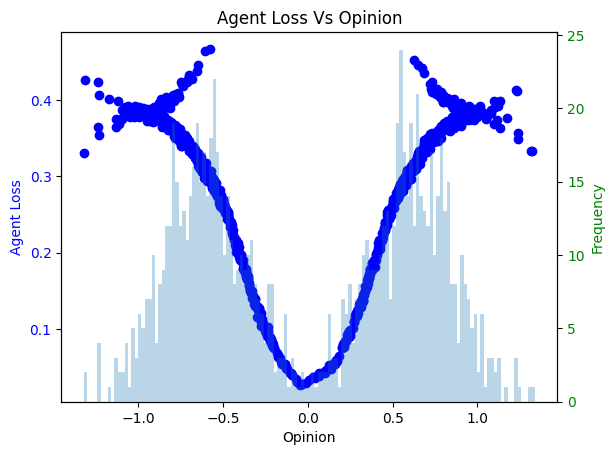

7701


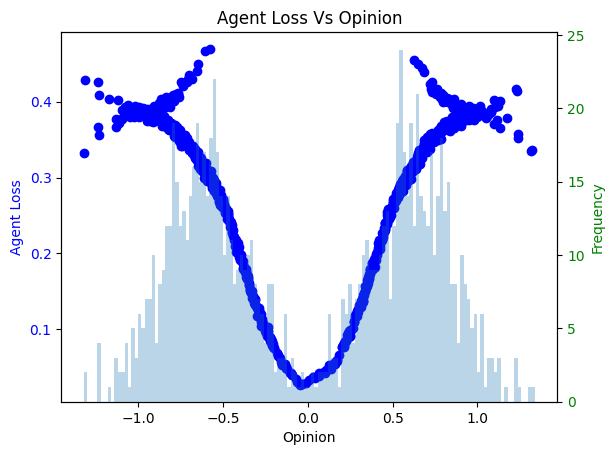

7751


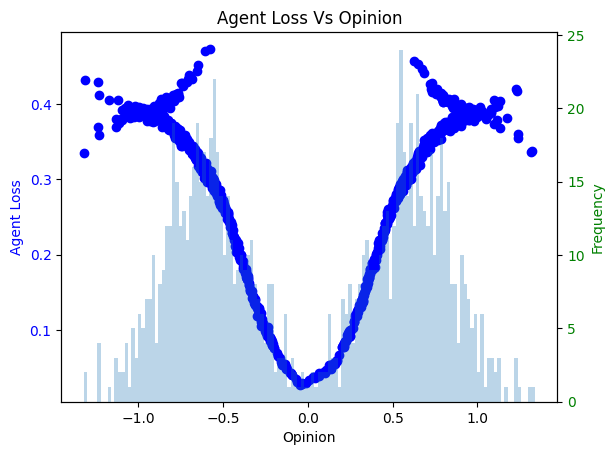

7801


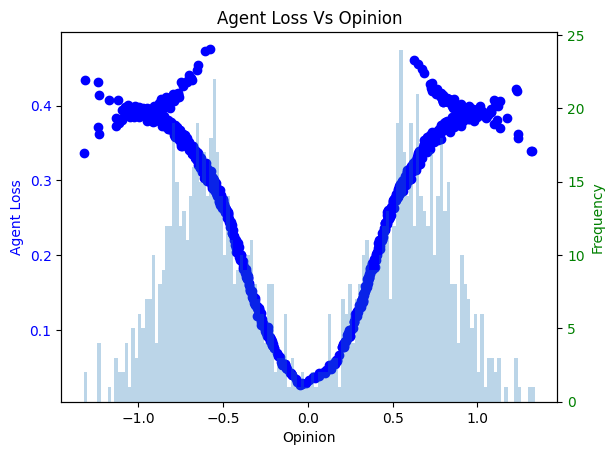

7851


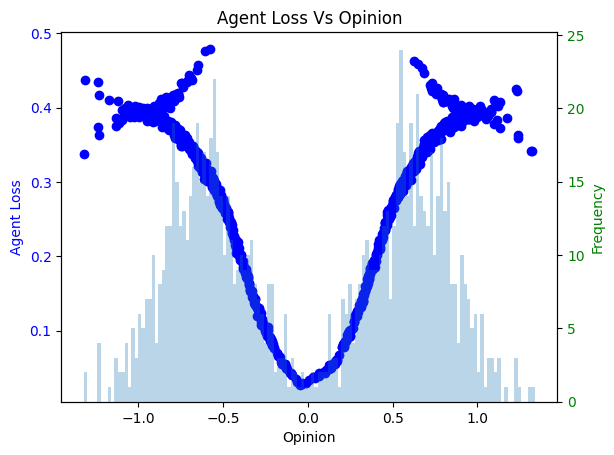

7901


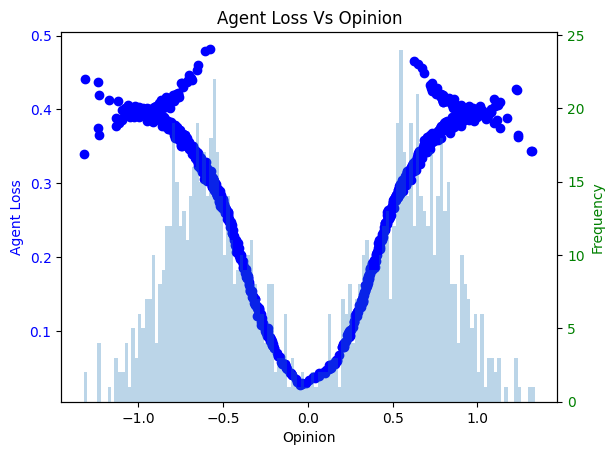

7951


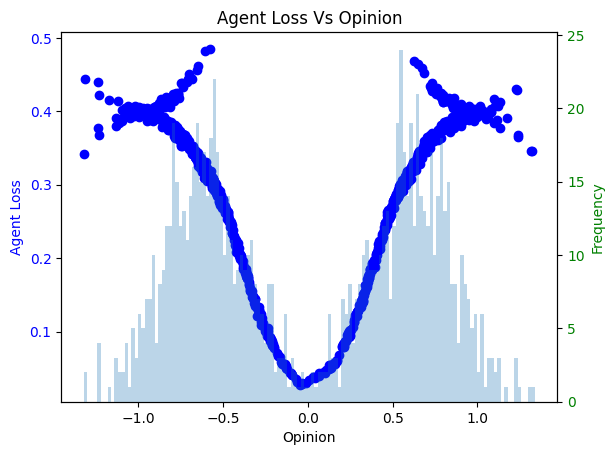

8001


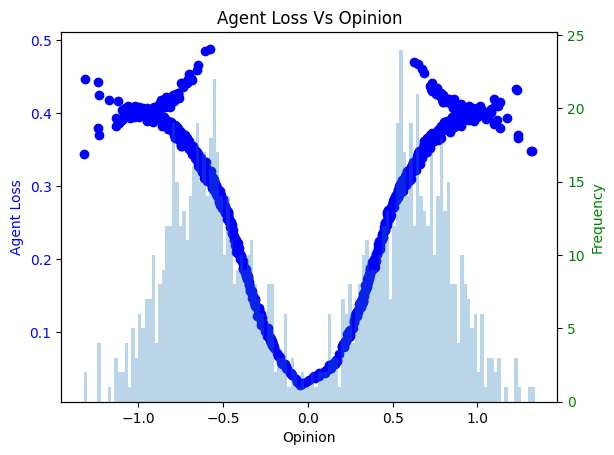

8051


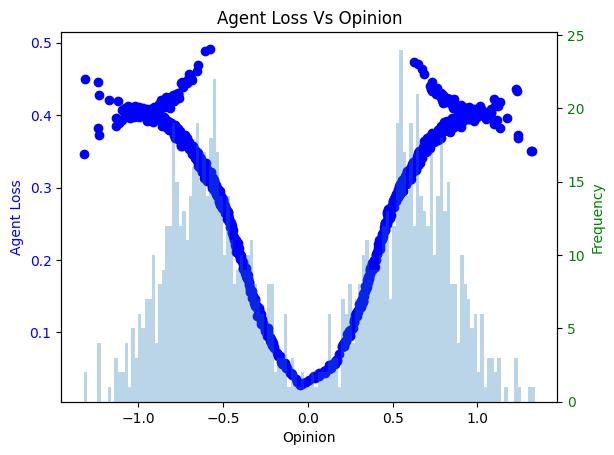

8101


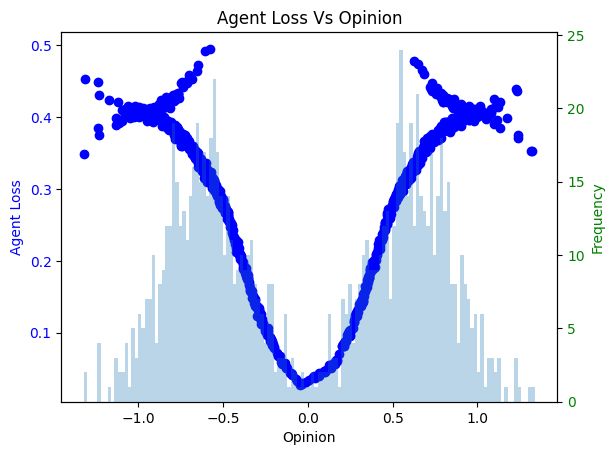

8151


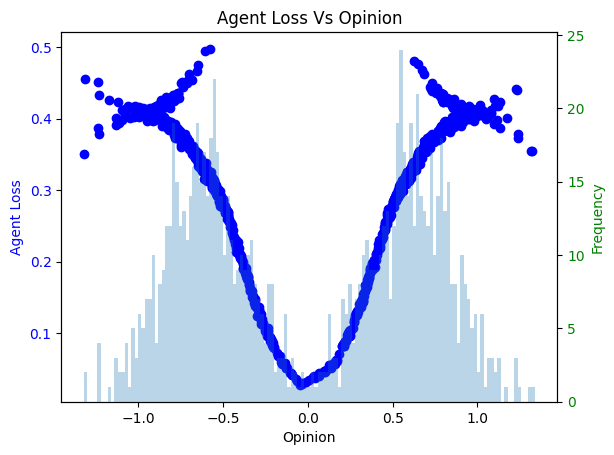

8201


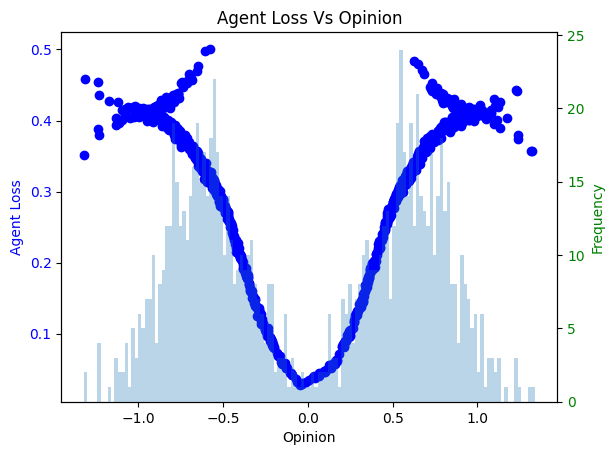

8251


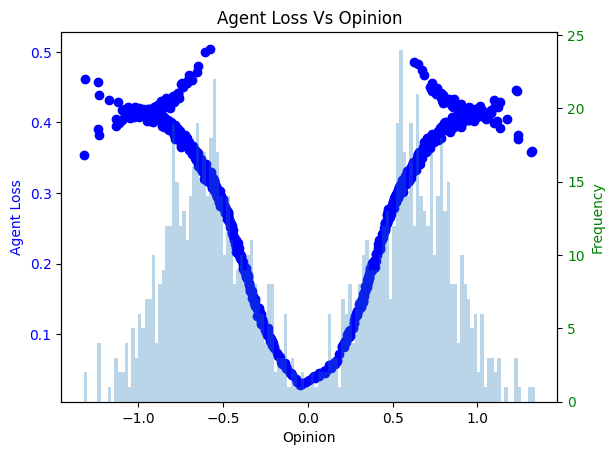

8301


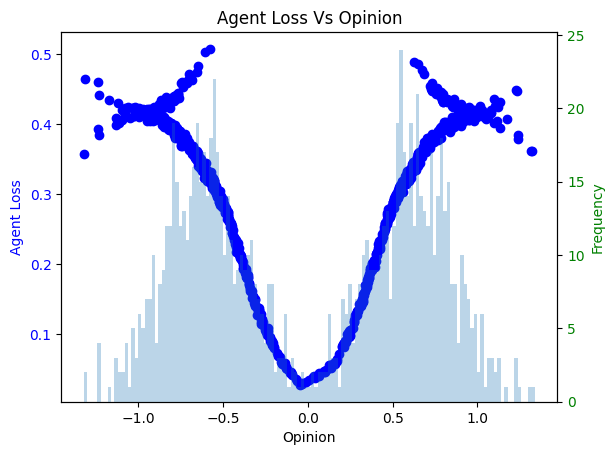

8351


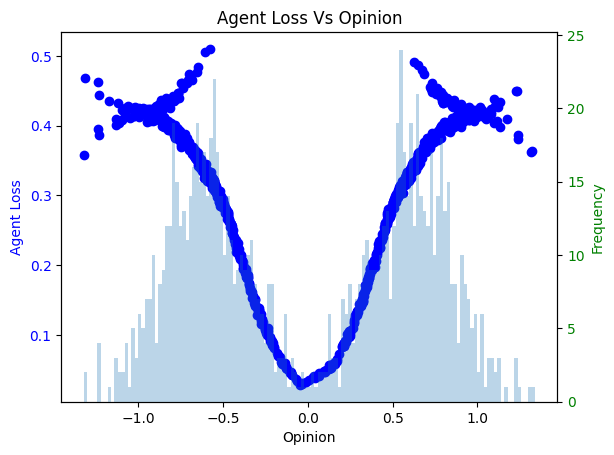

8401


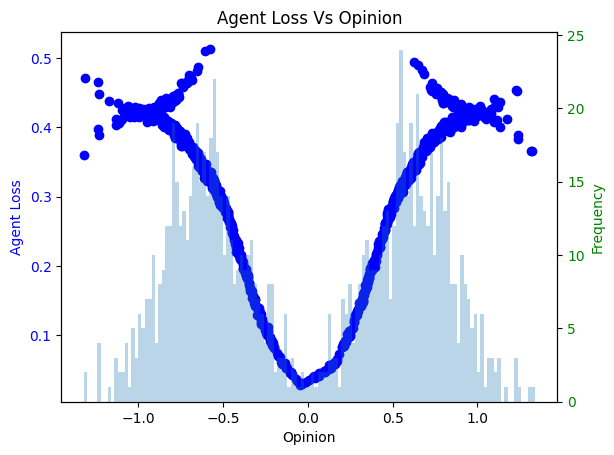

8451


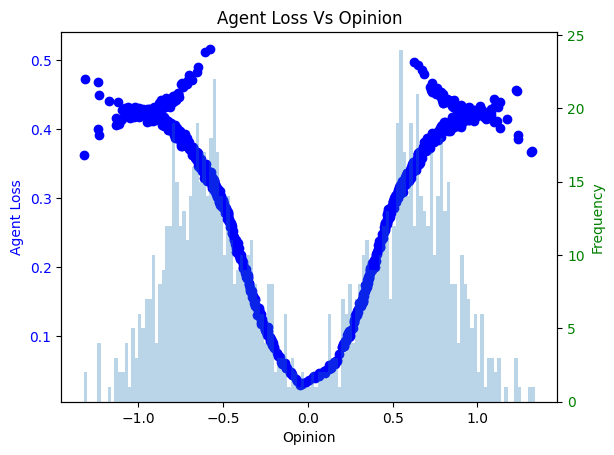

8501


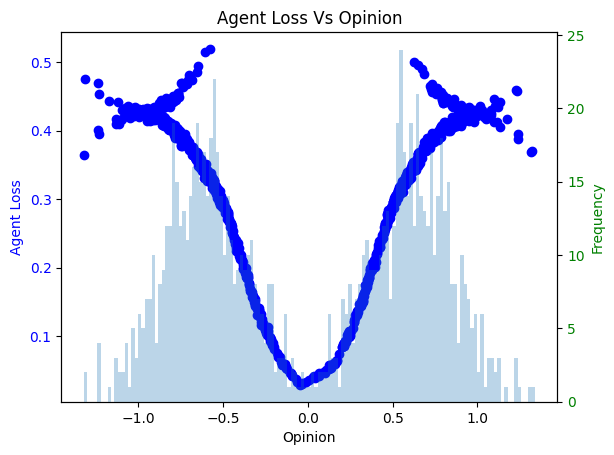

8551


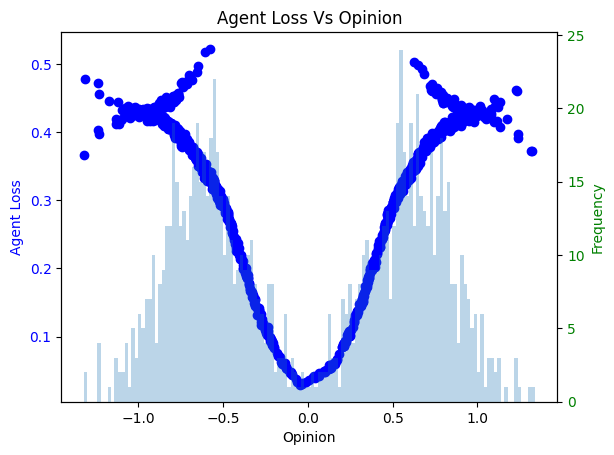

8601


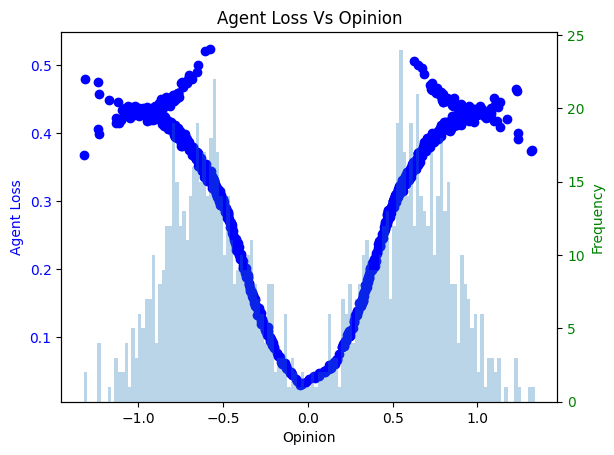

8651


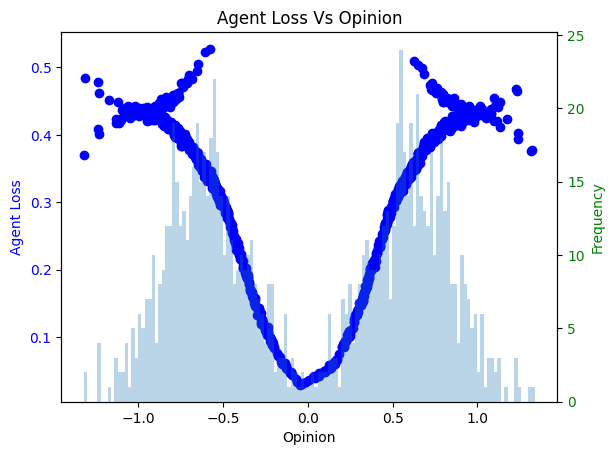

8701


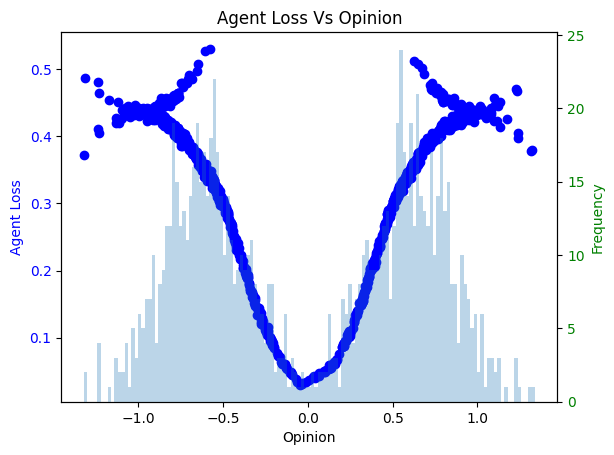

8751


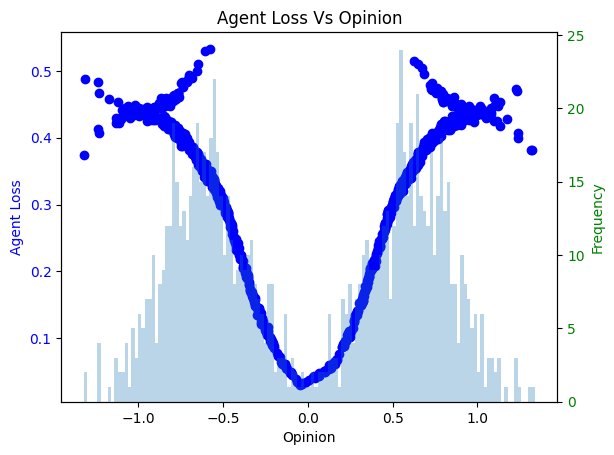

8801


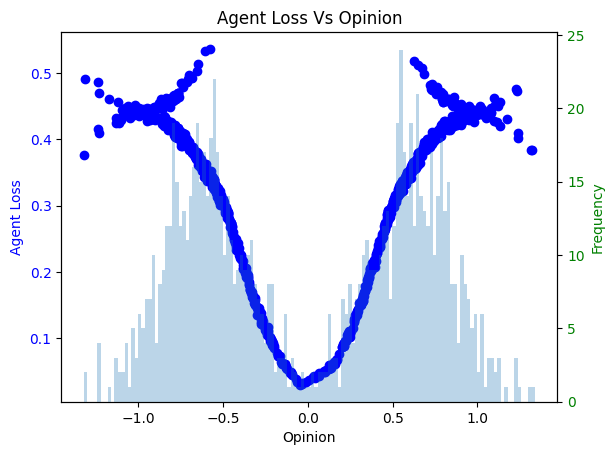

8851


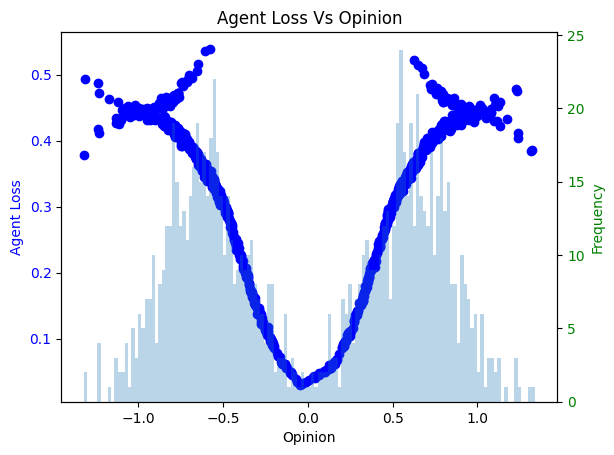

8901


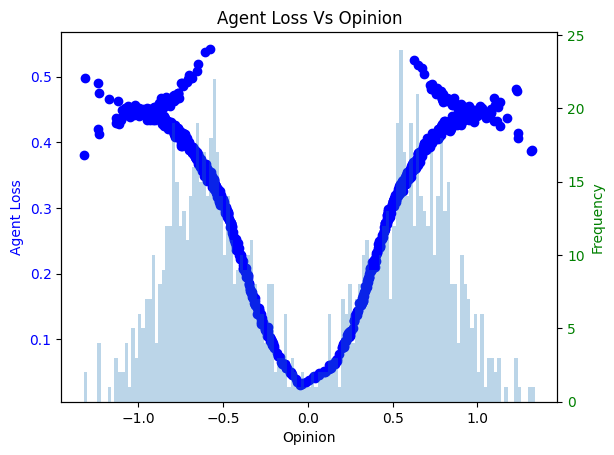

8951


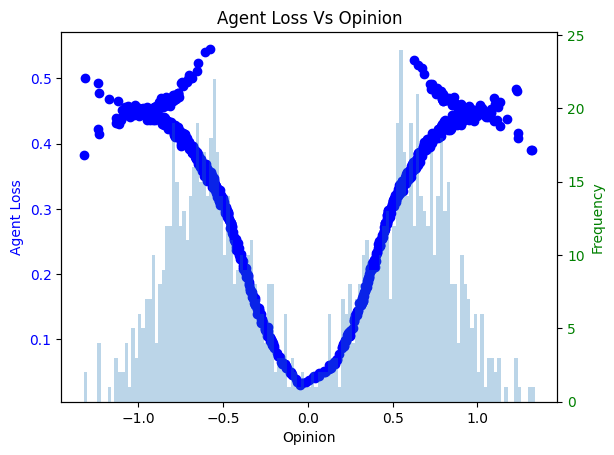

9001


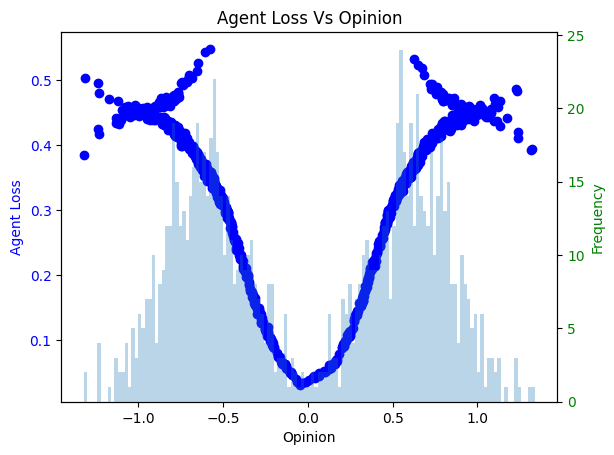

9051


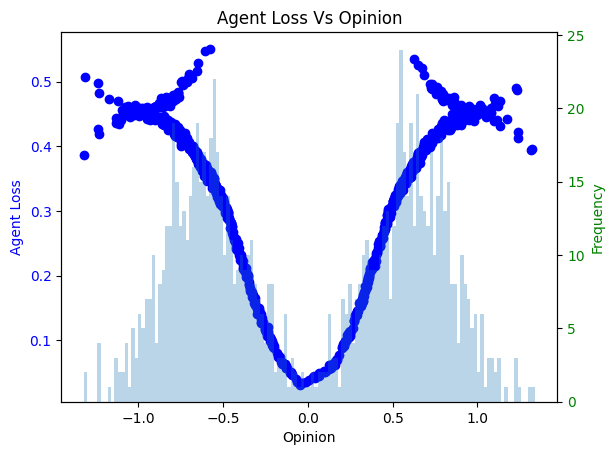

9101


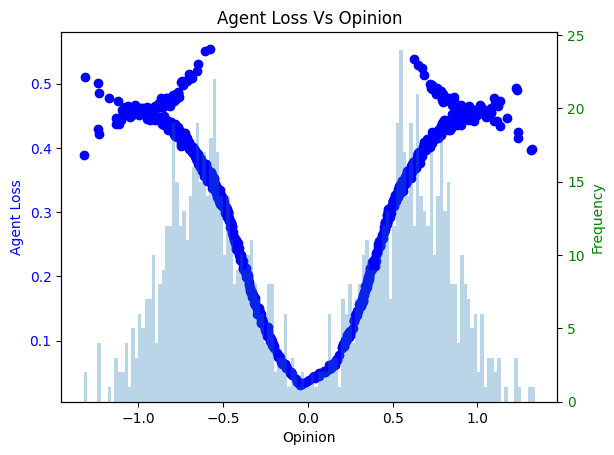

9151


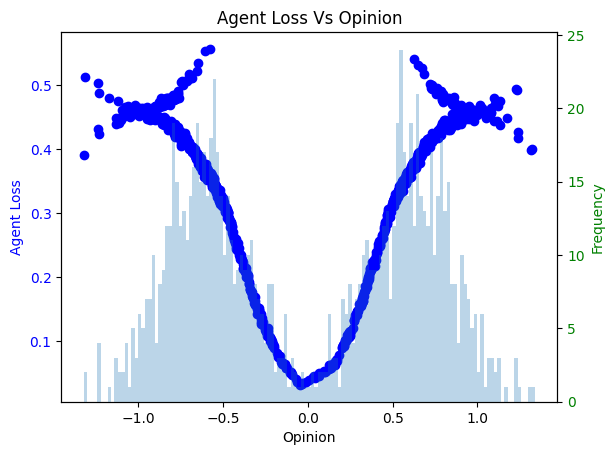

9201


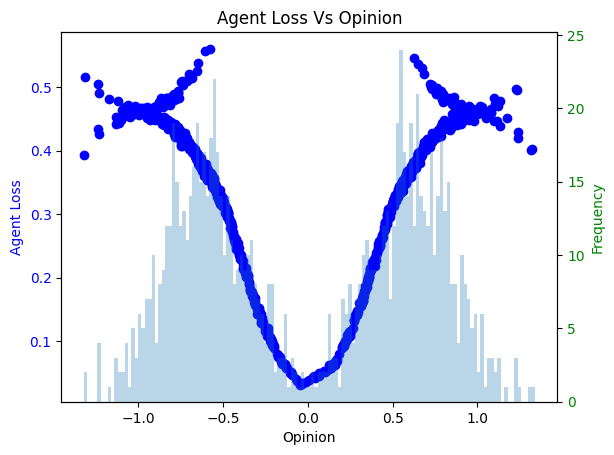

9251


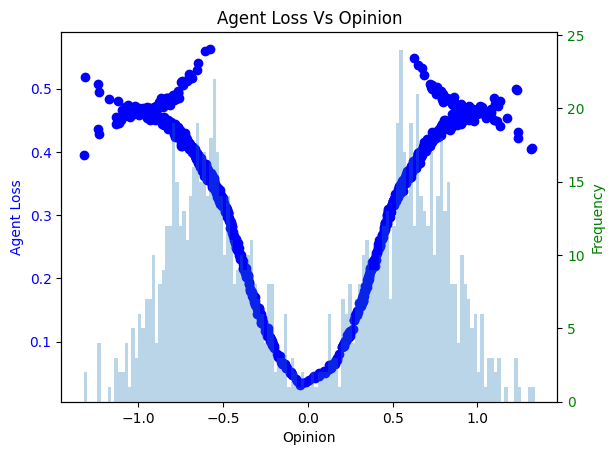

9301


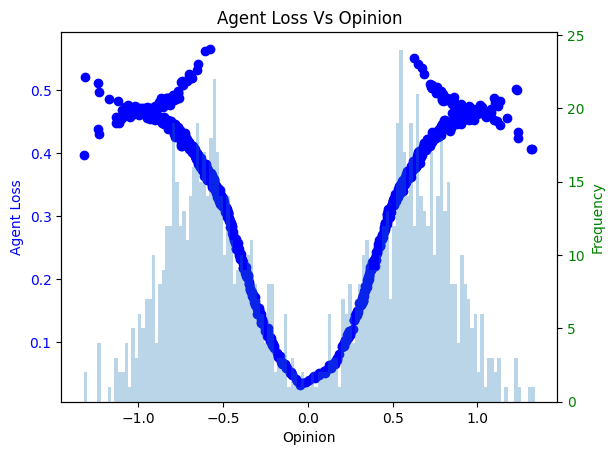

9351


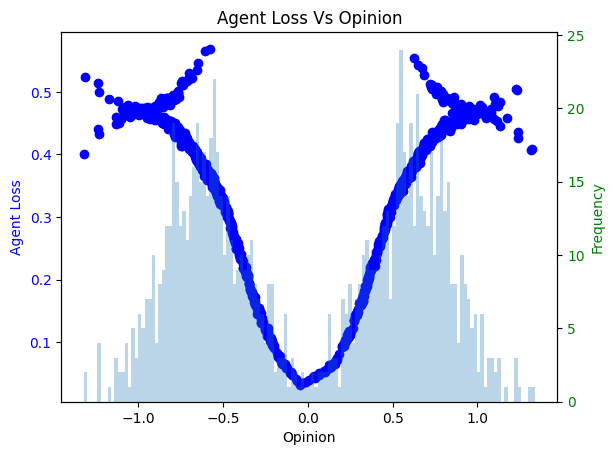

9401


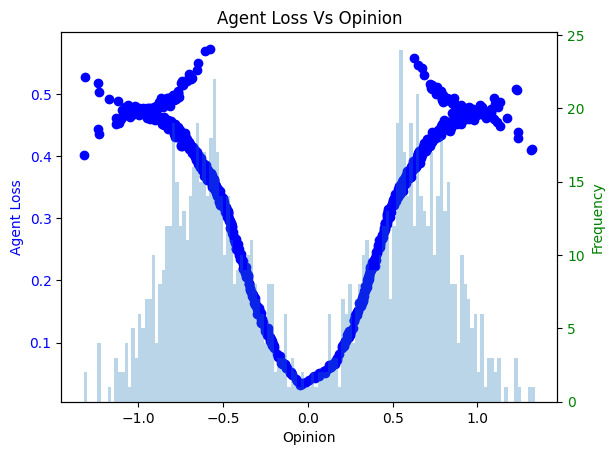

9451


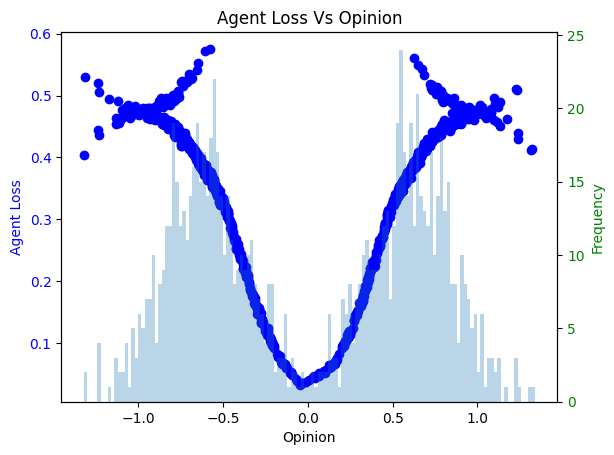

9501


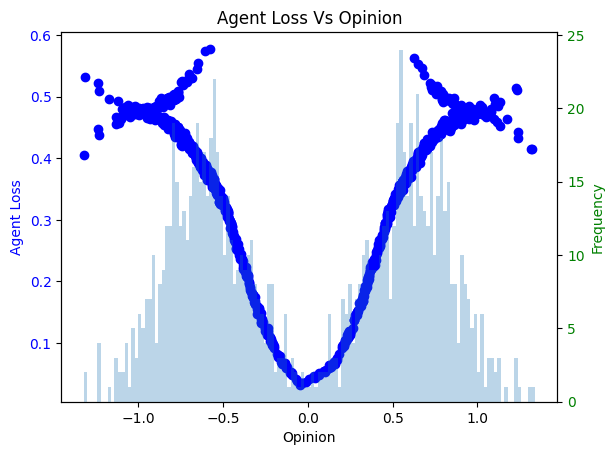

9551


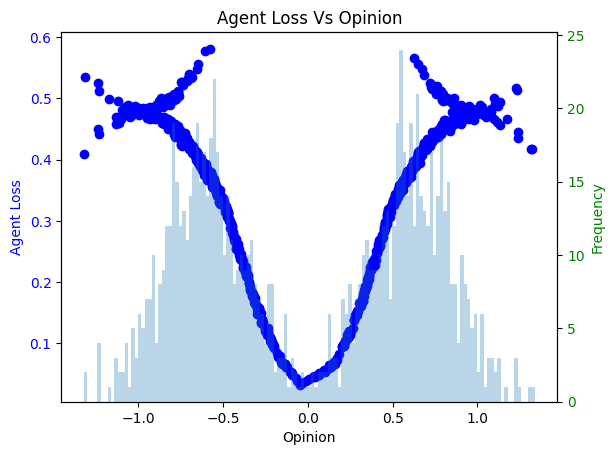

9601


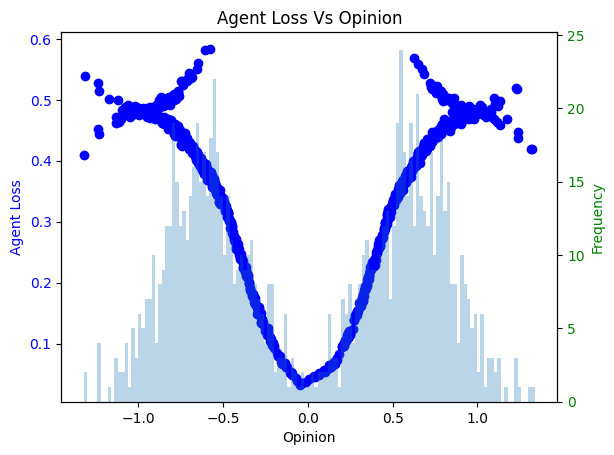

9651


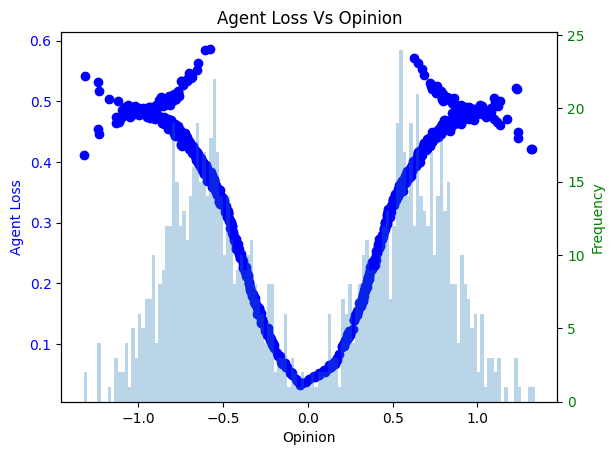

9701


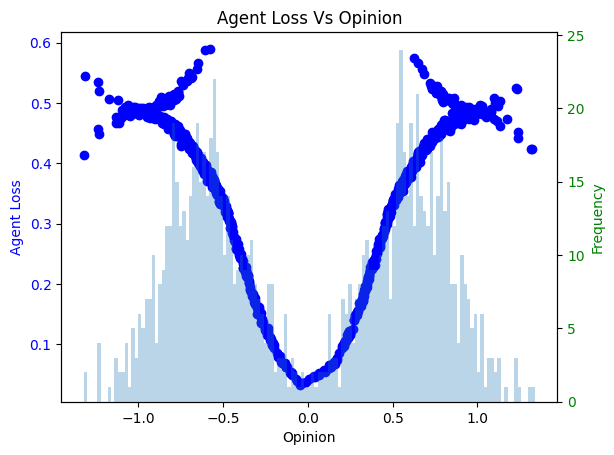

9751


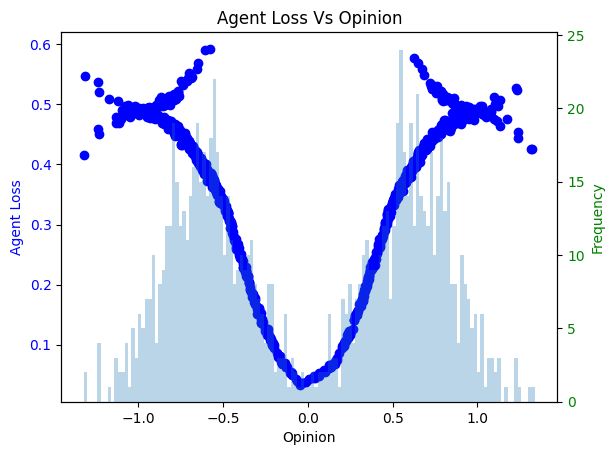

9801


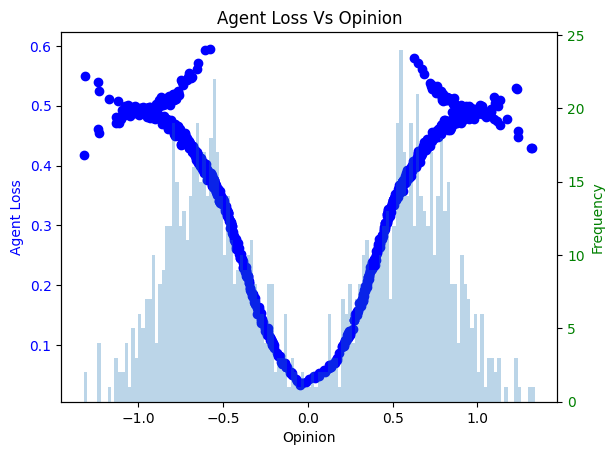

9851


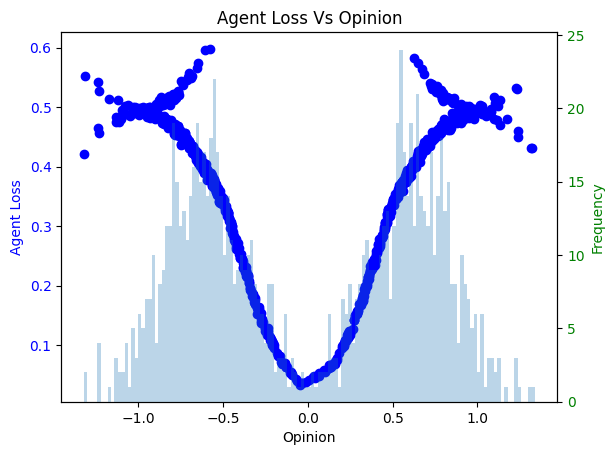

9901


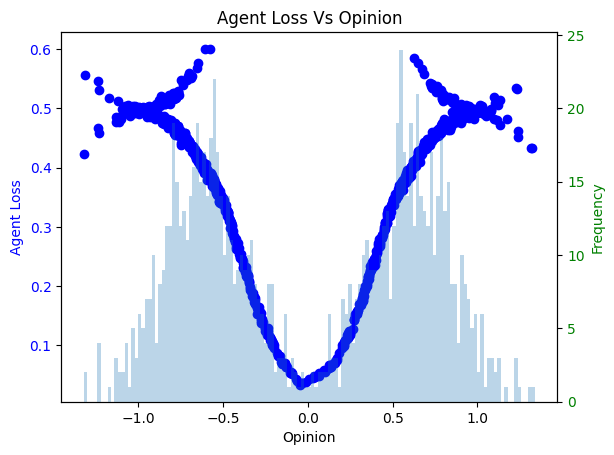

9951


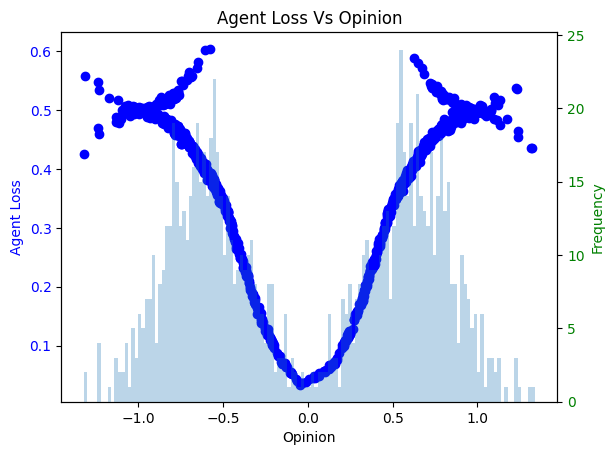

: 

In [53]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }

for agents in sim_agents_list:
    first_agent = list(agents.values())[0]
    # print(first_agent.agent_loss_history)
    iterations = len(first_agent.old_strategy_weights) - 1
    print(f"=================================")
    print(f"Sim with {iterations} iterations")
    print(f"=================================")
    for agent in agents.values():
        agent.update_agent_strat_prob_history()

    # Sort agents by their opinions
    sorted_agents = sort_agents_by_opinion(agents)
    for iteration in range(1, iterations, 50):
        print(iteration)
        # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
        opinions = []
        losses = []

        # Collect data for each agent
        for uuid, agent in sorted_agents:
            opinions.append(agent.opinions[0])
            avg_agent_loss_up_to_this_point = sum(agent.agent_loss_history[:iteration]) / iterations
            losses.append(avg_agent_loss_up_to_this_point)

        # Create a plot with two y-axes
        fig, ax1 = plt.subplots()

        # Scatter plot on primary y-axis
        ax1.scatter(opinions, losses, color='b')
        # Get range for which everyone is above the threshold
        # is_above_threshold = strat_to_threshold[strat] > 0.5
        # threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
        # if threshold_range:
        #     start_opinion = opinions[threshold_range[0]]
        #     end_opinion = opinions[threshold_range[1]]
        #     print(f"Stable Strategy Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
        #     y_coord = -40 if is_above_threshold == True else -40
        #     ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
        #     # ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
        #     #     xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
        #     # ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
        #     #     xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
        # stable_strat_opinion_ranges[f'stat_{strat}_iters_{iterations}'] = (start_opinion, end_opinion)

        # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

        ax1.set_xlabel('Opinion')
        ax1.set_ylabel(f'Agent Loss', color='b')
        
        # Create secondary y-axis for the histogram
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
        ax2.set_ylabel('Frequency', color='g')

        # Change the tick color and label color to match the plots
        ax1.tick_params(axis='y', labelcolor='b')
        ax2.tick_params(axis='y', labelcolor='g')

        plt.title(f'Agent Loss Vs Opinion')
        plt.show()
